<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Problem Statement</h2>
</div>

####  predicting the price of a used vehicle based on various car features

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Loading Data</h2>
</div>

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.float_format','{:.2f}'.format)

In [169]:
train_df= pd.read_csv("Data/train.csv.zip")
submission_df=pd.read_csv('Data/test.csv.zip')


In [170]:
train_df.shape

(54273, 13)

In [171]:
submission_df.shape  #without y variable , real world testing data

(36183, 12)

#### Inference- Dataset has 13 features , with 54273 rows . There are 4 numerical features and 9 categorical features

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3.Univariate Analysis</h2>
</div>

In [172]:
train_df.describe()   #checking feature summary , mean,std

id  model_year    milage      price
count 54273.00    54273.00  54273.00   54273.00
mean  27136.00     2015.09  72746.18   39218.44
std   15667.41        5.59  50469.49   72826.34
min       0.00     1974.00    100.00    2000.00
25%   13568.00     2012.00  32268.00   15500.00
50%   27136.00     2016.00  66107.00   28000.00
75%   40704.00     2019.00 102000.00   45000.00
max   54272.00     2024.00 405000.00 2954083.00

In [173]:
#checking missing values and their percentage
train_df.isna().sum()


id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [174]:
#checking duplicates 
duplicates=train_df.duplicated()
print(f"total duplicates are {duplicates.sum()}")

total duplicates are 0


In [175]:
#checking unqiue values in each column
train_df.nunique()

id              54273
brand              53
model            1827
model_year         34
milage           3212
fuel_type           7
engine           1061
transmission       46
ext_col           260
int_col           124
accident            2
clean_title         1
price            1481
dtype: int64

In [176]:
train_df['clean_title'].value_counts()    #checking value counts of column clean_title

Yes    54273
Name: clean_title, dtype: int64

In [177]:
train_df.price.value_counts()   #checking value counts of target column

15000    649
12000    495
30000    448
8500     424
17500    420
        ... 
38998      1
23739      1
28298      1
43389      1
37998      1
Name: price, Length: 1481, dtype: int64

<Axes: ylabel='Frequency'>

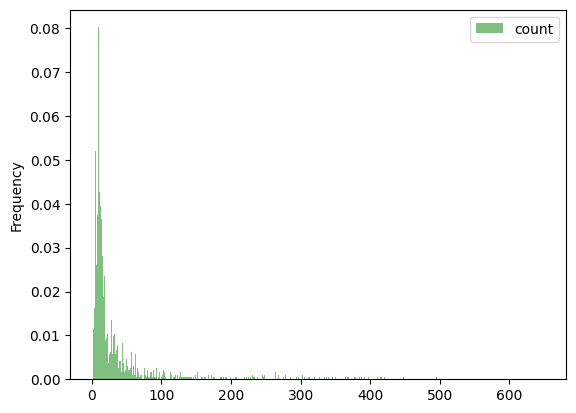

In [178]:
#distributipn of target variable

train_df['price'].value_counts().reset_index(name='count').plot(kind='hist',x='index',y='count',bins=500,color='green',density=6,alpha=0.5)

#### Inference 
* There are no missing and duplicates values in data
* clean_title column has no unique values, so there is Zero variance
* there are 1481 unique values for target varibale PRICE , the distribution is rightly skewed with most values have least frequecny of occurence, they could be outliers

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4.Data Preprocessing</h2>
</div>

####
* will remove extra space here, real the missing values, if any


In [179]:
num_col=train_df.select_dtypes(include=np.number).columns
print(f"Numerical columns are {num_col}" )
cat_col=train_df.select_dtypes(exclude=np.number).columns
print(f"Categorical columns are {cat_col}")


Numerical columns are Index(['id', 'model_year', 'milage', 'price'], dtype='object')
Categorical columns are Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col',
       'int_col', 'accident', 'clean_title'],
      dtype='object')


In [180]:
#remove spaces from columns 
train_df=train_df.rename(columns=lambda x:x.strip())


<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5.Bivariate Analysis -Statistical Significance Tests</h2>
</div>

#### 
* Check the statistical significance of categorical variables with target variable(Numerical) using ANOVA Test
* Check the statistical significance of numerical variables with target variable using correlation test

In [181]:
num_cols=num_col.tolist()
num_cols.remove('model_year')
num_cols.remove('id')
num_cols

['milage', 'price']

In [182]:
cat_cols=cat_col.tolist()
cat_cols.append('model_year')
cat_cols

['brand',
 'model',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'model_year']

In [183]:
train_df.head()

id    brand          model  model_year  milage fuel_type  \
0   0     Ford   F-150 Lariat        2018   74349  Gasoline   
1   1      BMW          335 i        2007   80000  Gasoline   
2   2   Jaguar      XF Luxury        2009   91491  Gasoline   
3   3      BMW   X7 xDrive40i        2022    2437    Hybrid   
4   4  Pontiac  Firebird Base        2001  111000  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col       accident clean_title  \
0                    10-Speed A/T    Blue    Gray  None reported         Yes   
1                     6-Speed M/T   Black   Black  None reported         Yes   
2                     6-Speed A/T  Purple   Beige  None reported         Yes   
3  Transmission w/Dual Shift Mode    Gray   Brown  None reported         Yes   
4                             A/T   White   Black  None reported         Yes   

   price  
0  11000  
1   8250  
2  15000  
3  63500  
4   7850

In [184]:
#ANOVA test using statsmodels api (for categorical columns)
import statsmodels.api as sm
from statsmodels.formula.api import ols

#significant value
alpha=0.05
significant_cat_col=[]
for col in cat_cols:
    model=ols('price ~C('+col+')',train_df).fit()
    print(col.ljust(50),'F-Statstics=%.5f,p=%.5f' %(model.fvalue,model.f_pvalue))
    anova_stats=sm.stats.anova_lm(model,type=2)
    if model.f_pvalue <= alpha:
        print(f"we reject null hypothesis- means there is relation between varibales")
        significant_cat_col.append(col)
        
    print(anova_stats)

print(f"statistically significant columns are {significant_cat_col}")

brand                                              F-Statstics=56.30861,p=0.00000
we reject null hypothesis- means there is relation between varibales
               df             sum_sq         mean_sq     F  PR(>F)
C(brand)    52.00  14747877413301.46 283613027178.87 56.31    0.00
Residual 54220.00 273093180191122.56   5036760977.34   NaN     NaN
model                                              F-Statstics=5.18862,p=0.00000
we reject null hypothesis- means there is relation between varibales
               df             sum_sq        mean_sq    F  PR(>F)
C(model)  1826.00  44042419400881.95 24119616320.31 5.19    0.00
Residual 52446.00 243798638203541.97  4648564965.94  NaN     NaN
fuel_type                                          F-Statstics=25.98215,p=0.00000
we reject null hypothesis- means there is relation between varibales
                   df             sum_sq         mean_sq     F  PR(>F)
C(fuel_type)     6.00    824528023953.10 137421337325.52 25.98    0.00
Residual  

In [185]:
#correleation test fro numerical cols 
from scipy.stats import pearsonr
pearson_coeff=pearsonr(train_df['milage'],train_df['price'])

if pearson_coeff[1]<=alpha:
    print(f"we reject null hypothesis, means 'milage' feature is statiscally significant")
    
                       
                       

we reject null hypothesis, means 'milage' feature is statiscally significant


#### Inference 
* all columns except clean_title are statiscally significant

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6.EDA</h2>
</div>

In [186]:
train_df.head()

id    brand          model  model_year  milage fuel_type  \
0   0     Ford   F-150 Lariat        2018   74349  Gasoline   
1   1      BMW          335 i        2007   80000  Gasoline   
2   2   Jaguar      XF Luxury        2009   91491  Gasoline   
3   3      BMW   X7 xDrive40i        2022    2437    Hybrid   
4   4  Pontiac  Firebird Base        2001  111000  Gasoline   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col       accident clean_title  \
0                    10-Speed A/T    Blue    Gray  None reported         Yes   
1                     6-Speed M/T   Black   Black  None reported         Yes   
2                     6-Speed A/T  Purple   Beige  None reported         Yes   
3  Transmission w/Dual Shift Mode    Gray   Brown  None reported         Yes   
4                             A/T   White   Black  None reported         Yes   

   price  
0  11000  
1   8250  
2  15000  
3  63500  
4   7850

In [187]:
# target variable distribution
sns.histplot(data=train_df,x='price',kde=True)

<Axes: xlabel='price', ylabel='Count'>

In [188]:
train_df.price.describe()

count     54273.00
mean      39218.44
std       72826.34
min        2000.00
25%       15500.00
50%       28000.00
75%       45000.00
max     2954083.00
Name: price, dtype: float64

In [189]:
train_df[train_df.price>1500000].shape

(32, 13)

In [190]:
sns.boxplot(train_df.price)

<Axes: >

#### Inference
* price label has too many outliers and right skewed distribution

In [191]:
#lets understand effect  all feature wrt to target variable
print(train_df.brand.nunique())
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(15,10))
sns.histplot(data=train_df,x='brand',kde=True,bins=50,ax=ax[0])
sns.boxenplot(data=train_df,x='brand',y='price',ax=ax[1])
plt.xticks(rotation=90)
plt.show()

53


In [192]:
train_df.brand.value_counts()

BMW              7369
Ford             6706
Mercedes-Benz    5087
Chevrolet        4424
Audi             2922
Porsche          2627
Toyota           2315
Lexus            2257
Jeep             2247
Land             1995
Cadillac         1565
Nissan           1252
GMC              1076
Dodge            1011
RAM               966
INFINITI          957
Lincoln           767
Mazda             748
Subaru            739
Hyundai           694
Jaguar            661
Volkswagen        628
Honda             624
Acura             580
Kia               526
Volvo             452
MINI              364
Maserati          293
Bentley           284
Chrysler          258
Genesis           249
Buick             228
Mitsubishi        182
Hummer            176
Pontiac           149
Alfa              144
Rolls-Royce       142
Lamborghini       122
Tesla             110
Ferrari            87
Saturn             58
Scion              53
Aston              50
McLaren            43
Rivian             27
Mercury   

### Inference
* looks *ford* and *bww* are most no of used cars with very few outliers
* density curves shows peaks at certain brands with right skewness
* there are few brand models with outliers

1827


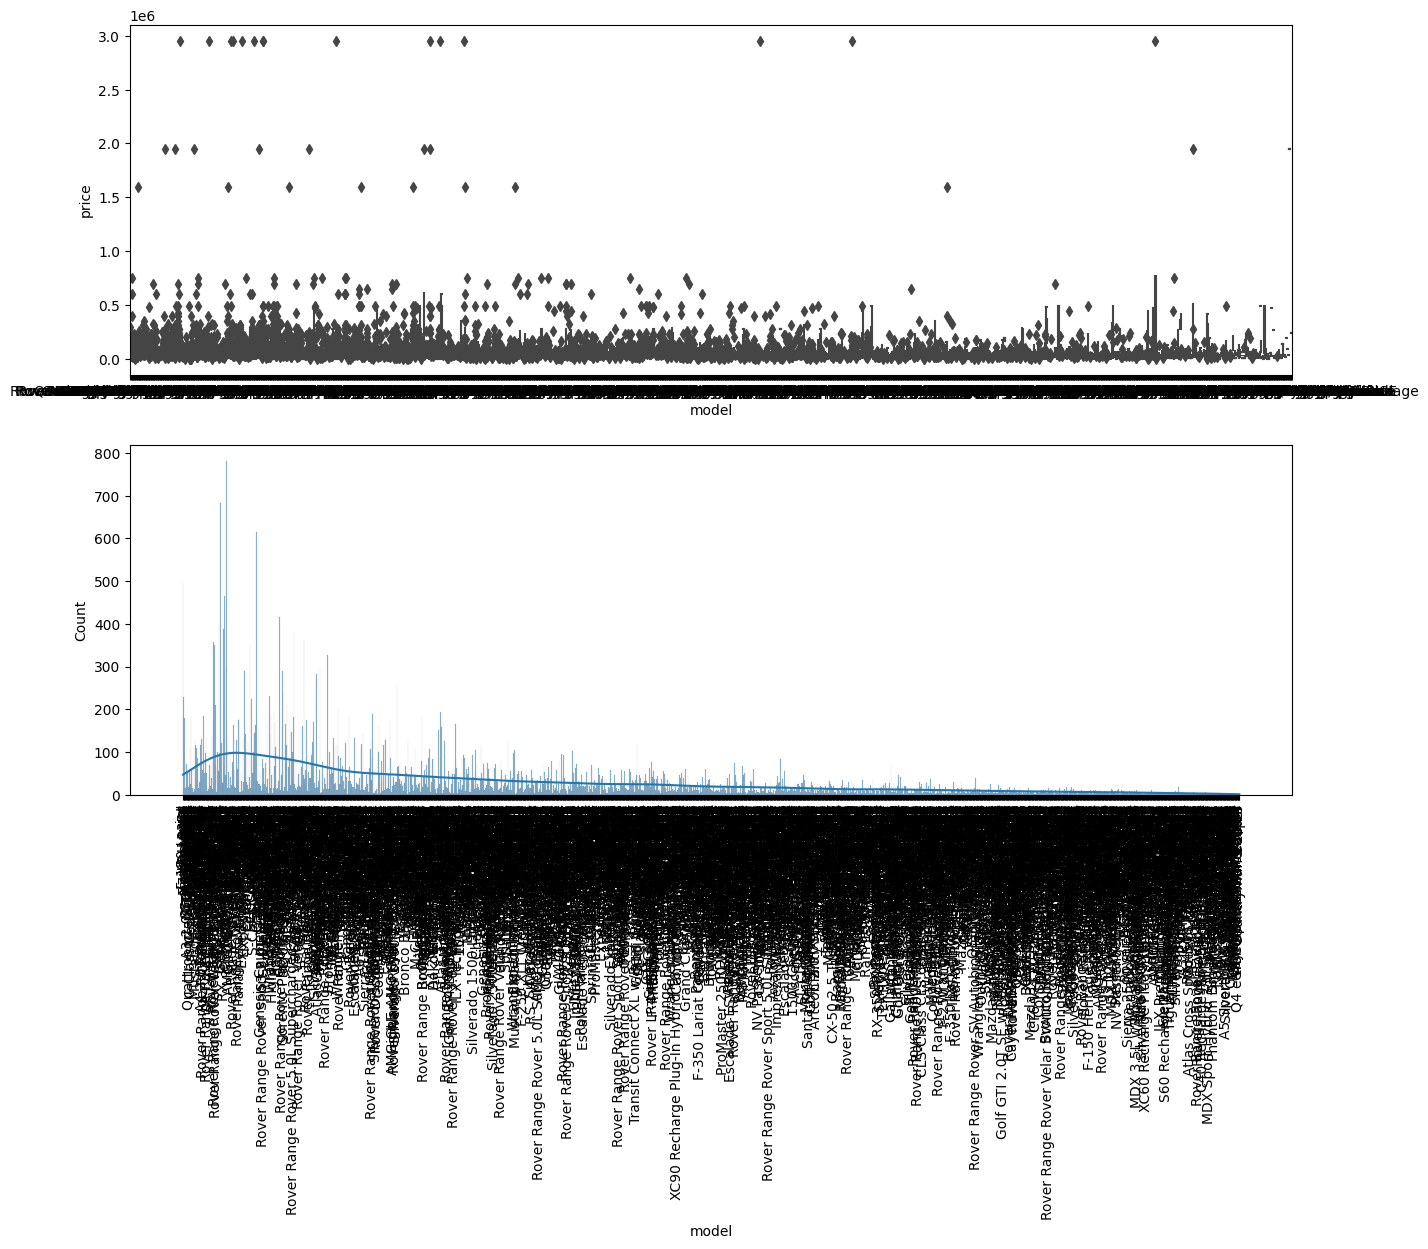

In [193]:
print(train_df.model.nunique())
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(15,10))
sns.histplot(data=train_df,x='model',kde=True,bins=50,ax=ax[1])
sns.boxplot(data=train_df,x='model',y='price',ax=ax[0])
plt.xticks(rotation=90)
plt.show()

34


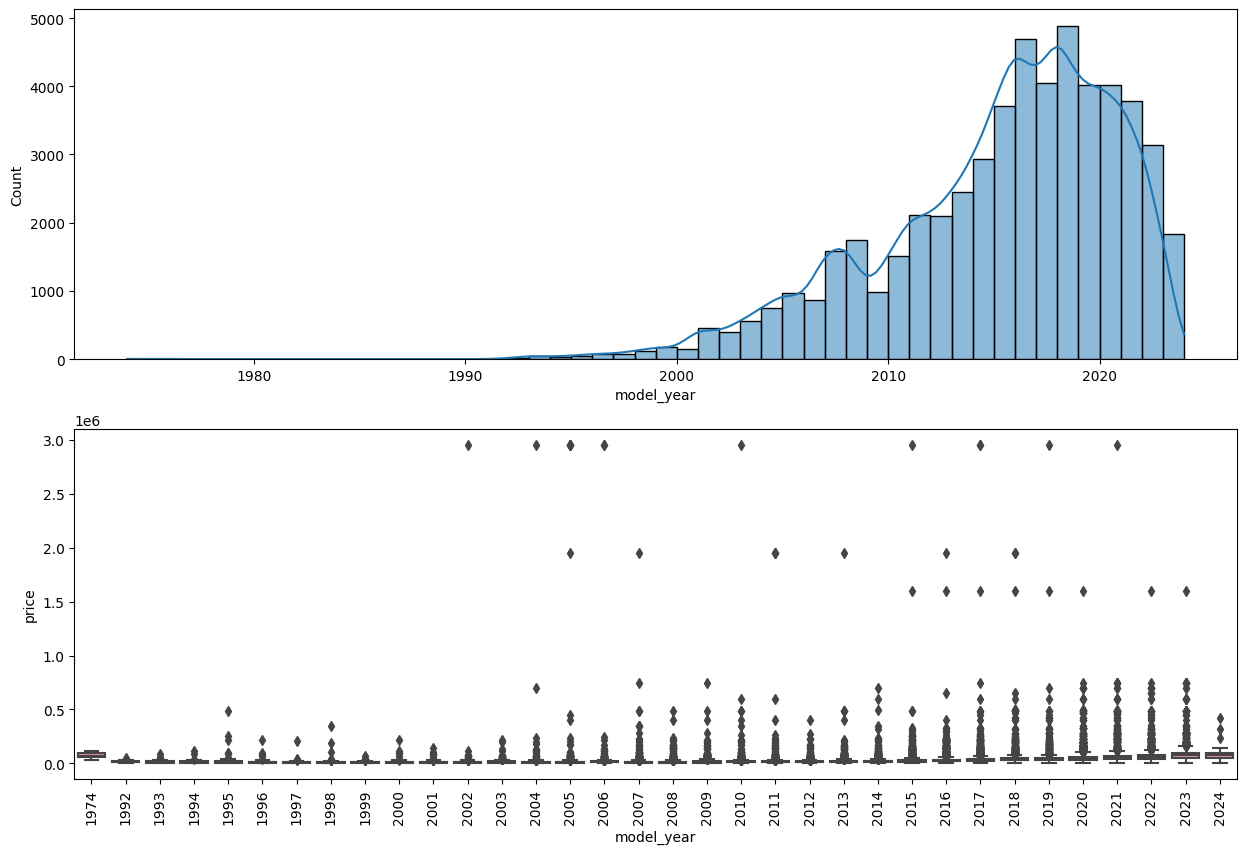

In [194]:
print(train_df.model_year.nunique())
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(15,10))
sns.histplot(data=train_df,x='model_year',kde=True,bins=50,ax=ax[0])
sns.boxplot(data=train_df,x='model_year',y='price',ax=ax[1])
plt.xticks(rotation=90)
plt.show()

In [195]:
train_df.model_year.value_counts()

2018    4888
2016    4693
2017    4042
2019    4014
2020    4012
2021    3781
2015    3715
2022    3140
2014    2941
2013    2452
2011    2106
2012    2101
2023    1794
2008    1741
2007    1584
2010    1508
2009     983
2005     967
2006     865
2004     745
2003     557
2001     461
2002     391
1999     176
2000     152
1998     117
1997      80
1996      76
1995      48
1993      47
2024      42
1994      37
1992      12
1974       5
Name: model_year, dtype: int64

#### Inference
* model_year distribution is negative skewed means, mean is smaller than median and mean is pulled in direction of negative tail
* there are few outliers after 1.5le6

In [196]:
print(train_df.fuel_type.nunique())
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(15,10))
sns.histplot(data=train_df,x='fuel_type',kde=True,bins=50,ax=ax[1])
sns.boxplot(data=train_df,x='fuel_type',y='price',ax=ax[0])
plt.xticks(rotation=90)
plt.show()

7


####  Inference
* fuel type has some outliers over price 1.5le6
  

1061


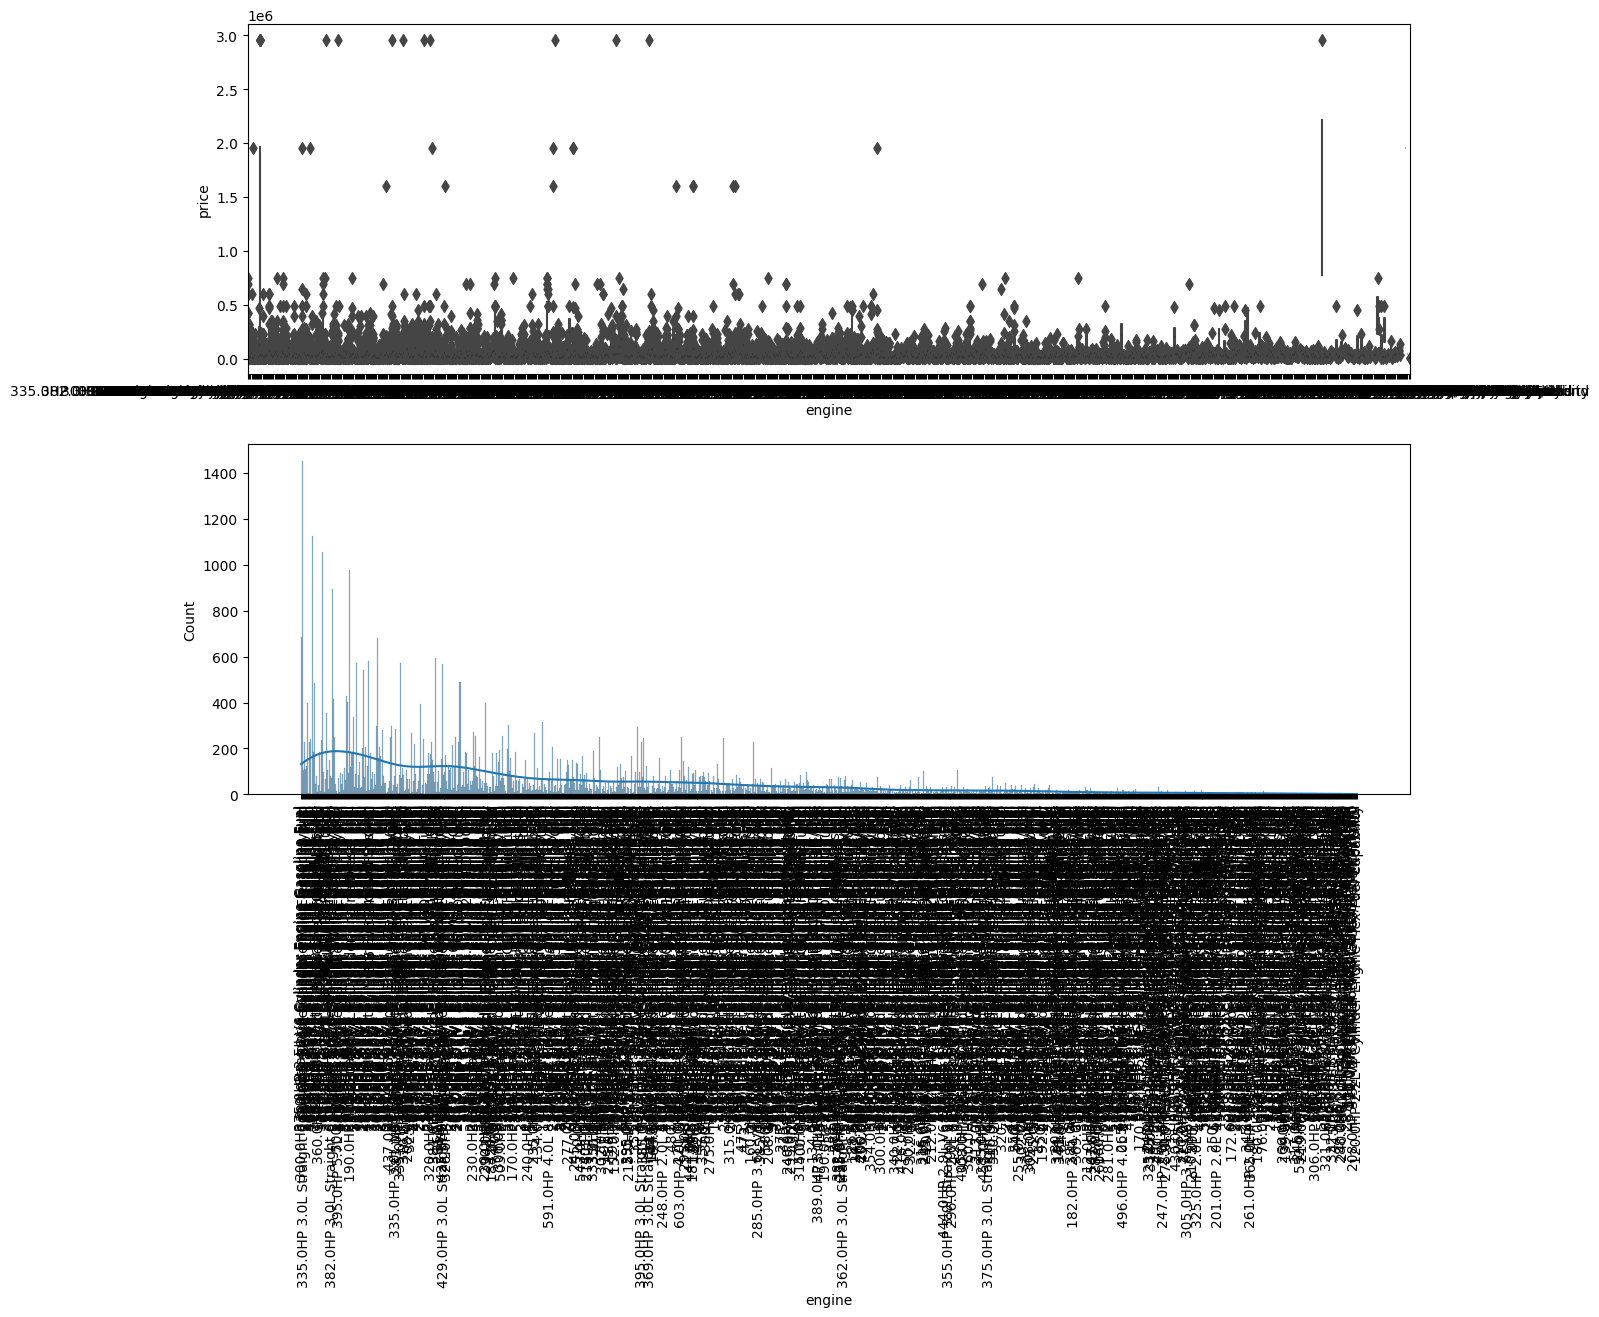

In [197]:
print(train_df.engine.nunique())
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(15,10))
sns.histplot(data=train_df,x='engine',kde=True,bins=50,ax=ax[1])
sns.boxenplot(data=train_df,x='engine',y='price',ax=ax[0])
plt.xticks(rotation=90)
plt.show()

46


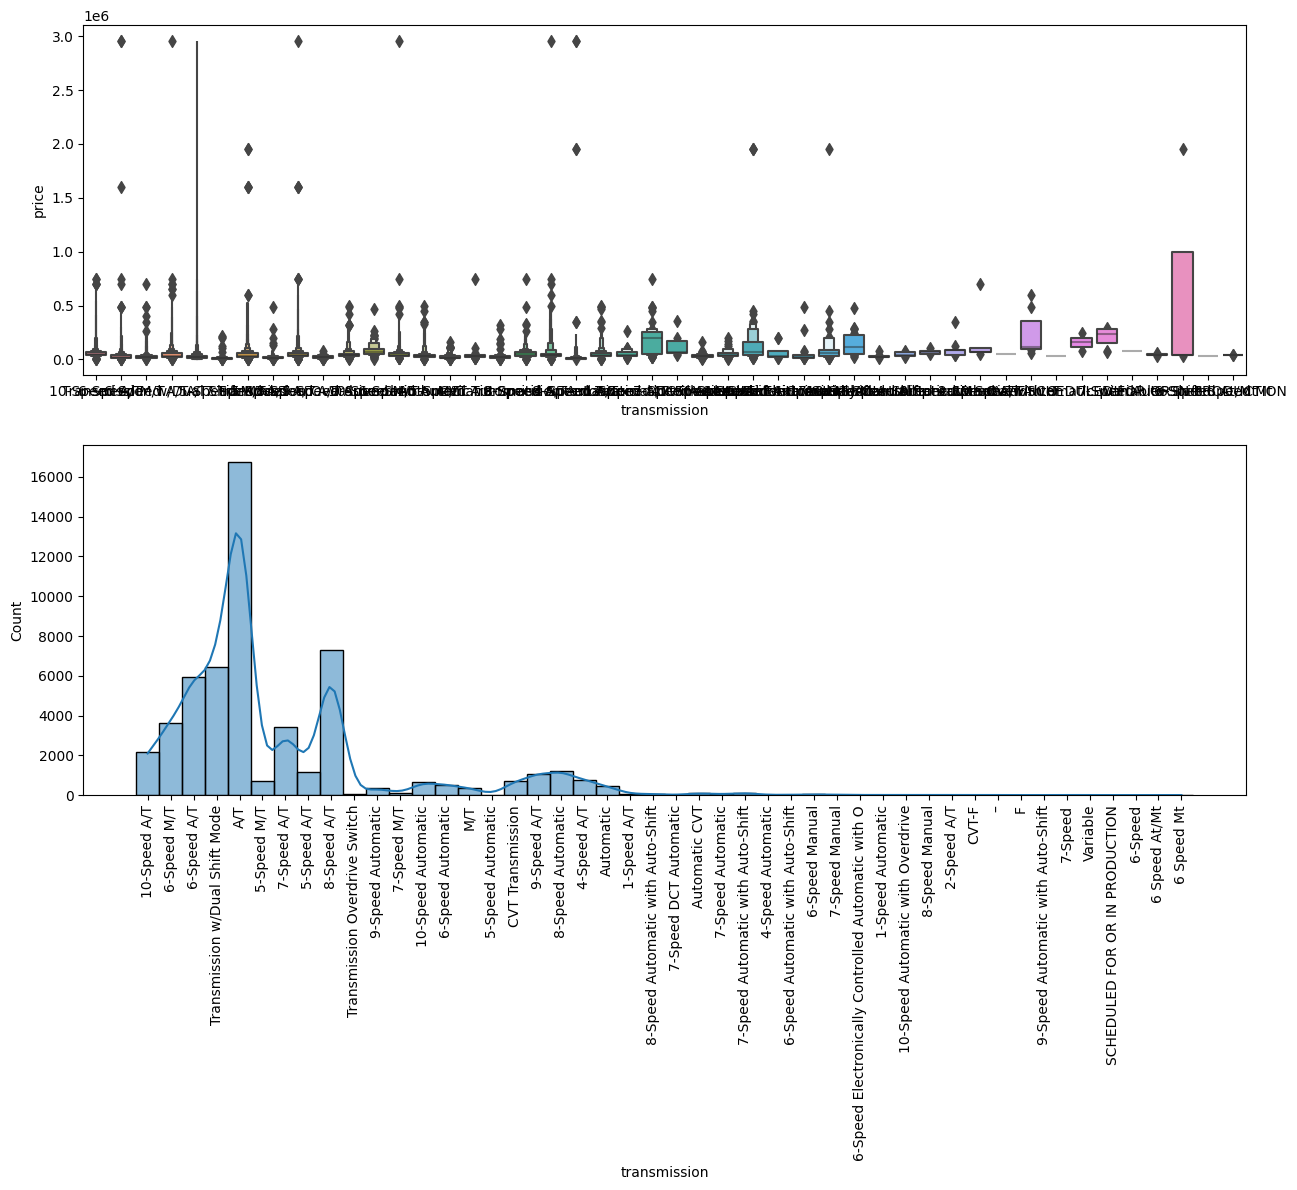

In [198]:
print(train_df.transmission.nunique())
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(15,10))
sns.histplot(data=train_df,x='transmission',kde=True,bins=50,ax=ax[1])
sns.boxenplot(data=train_df,x='transmission',y='price',ax=ax[0])
plt.xticks(rotation=90)
plt.show()

In [199]:
print(train_df.ext_col.nunique())
fig,ax= plt.subplots(nrows=2,ncols=1,figsize=(15,10))
sns.histplot(data=train_df,x='ext_col',kde=True,bins=50,ax=ax[1])
sns.boxenplot(data=train_df,x='ext_col',y='price',ax=ax[0])
plt.xticks(rotation=90)
plt.show()

260


#### Inference
* ext_col has right skewed distribution and has ouliers

#### lets check the outliers and other info of numerical features

<Axes: xlabel='price', ylabel='milage'>

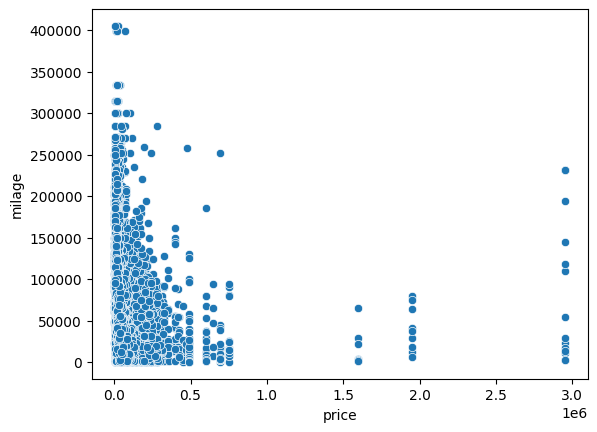

In [200]:
sns.scatterplot(data=train_df,x='price',y='milage')

<Axes: >

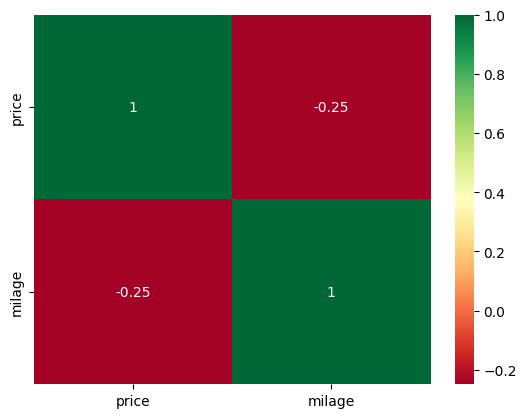

In [201]:
#lets check the correlation between price vs milage
train_df[['price','milage']].corr()
sns.heatmap(train_df[['price','milage']].corr(),annot=True,cmap='RdYlGn')

#### Inference
* milage is negative corr with price and outliers above price1.5le6

In [202]:
sns.boxplot(data=train_df)

<Axes: >

### Inference
* price range above 200000 looks outliers 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7.Data Preparation</h2>
</div>

### 
* outlier treatment
* feature encoding
* spliting dataset

In [203]:
train_df.shape

(54273, 13)

In [204]:
#let remove extreme outliers from price variable , values where prices is more than 1.5le6`a
train_df=train_df.drop(index=train_df[train_df['price']>1500000].index)

In [205]:
train_df.shape

(54241, 13)

In [206]:
#lets check outlier of target varibale mathmatically using robust scaler as it has many oulier and is rightly skewed
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
train_df['scaled_price']=scaler.fit_transform(train_df.price.values.reshape(-1,1))
train_df['scaled_price'].describe()


count   54241.00
mean        0.33
std         1.51
min        -0.88
25%        -0.42
50%         0.00
75%         0.58
max        24.47
Name: scaled_price, dtype: float64

<Axes: xlabel='scaled_price', ylabel='Density'>

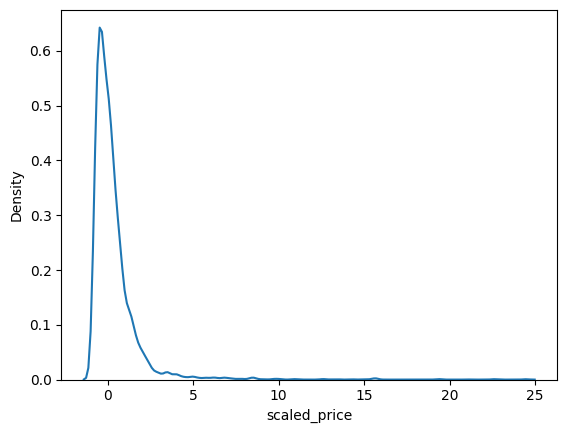

In [207]:
sns.kdeplot(train_df['scaled_price'])

In [208]:
train_df['scaled_price'][train_df['scaled_price']>5].shape

(789,)

In [209]:
train_df['scaled_price'][train_df['scaled_price']>5].shape  #let keep thrshold as 5 nand remove all prices values from dataframe where price is > 5
train_df=train_df.drop(index=train_df[train_df['scaled_price']>5].index)
train_df.shape
                       

(53452, 14)

In [210]:
sns.kdeplot(train_df['scaled_price'])

<Axes: xlabel='scaled_price', ylabel='Density'>

In [211]:
#lets encode categorical columns
cat_cols
for col in significant_cat_col:
    print(f"{col}-{train_df[col].nunique()}")

brand-52
model-1816
fuel_type-7
engine-1059
transmission-46
ext_col-254
int_col-124
accident-2
model_year-34


In [212]:
submission_df.head()

id          brand                                              model  \
0  54273  Mercedes-Benz                                      E-Class E 350   
1  54274          Lexus                                        RX 350 Base   
2  54275  Mercedes-Benz                                      C-Class C 300   
3  54276           Land  Rover Range Rover 5.0L Supercharged Autobiogra...   
4  54277            BMW                                       X6 xDrive40i   

   model_year  milage fuel_type  \
0        2014   73000  Gasoline   
1        2015  128032  Gasoline   
2        2015   51983  Gasoline   
3        2018   29500  Gasoline   
4        2020   90000  Gasoline   

                                              engine  \
0      302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1      275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
2       241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
3       518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   

                     transmission ext_col int_col  \
0                             A/T   White   Beige   
1                     8-Speed A/T  Silver   Black   
2                     7-Speed A/T    Blue   White   
3  Transmission w/Dual Shift Mode   White   White   
4                     8-Speed A/T   White   Black   

                                 accident clean_title  
0                           None reported         Yes  
1                           None reported         Yes  
2                           None reported         Yes  
3  At least 1 accident or damage reported         Yes  
4  At least 1 accident or damage reported         Yes

In [213]:
submission_df_new=submission_df.loc[:,significant_cat_col]  #feature seledction for submission data 
submission_df_new['milage']=submission_df.loc[:,'milage']

In [214]:
submission_df_new

brand                                              model  \
0      Mercedes-Benz                                      E-Class E 350   
1              Lexus                                        RX 350 Base   
2      Mercedes-Benz                                      C-Class C 300   
3               Land  Rover Range Rover 5.0L Supercharged Autobiogra...   
4                BMW                                       X6 xDrive40i   
...              ...                                                ...   
36178            GMC                                       Yukon Denali   
36179      Chevrolet                    Silverado 1500 Z71 Extended Cab   
36180         Toyota                                         Corolla LE   
36181        Lincoln                                  Navigator Reserve   
36182      Chevrolet                                           Tahoe LT   

           fuel_type                                             engine  \
0           Gasoline      302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1           Gasoline      275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
2           Gasoline       241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
3           Gasoline       518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4           Gasoline  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
...              ...                                                ...   
36178       Gasoline       420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
36179       Gasoline       295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel   
36180       Gasoline       132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel   
36181       Gasoline      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
36182  E85 Flex Fuel  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   

                         transmission ext_col int_col  \
0                                 A/T   White   Beige   
1                         8-Speed A/T  Silver   Black   
2                         7-Speed A/T    Blue   White   
3      Transmission w/Dual Shift Mode   White   White   
4                         8-Speed A/T   White   Black   
...                               ...     ...     ...   
36178                    10-Speed A/T    Gray   Black   
36179                     4-Speed A/T     Red    Gray   
36180                     5-Speed M/T   Beige    Gray   
36181                    10-Speed A/T   Black  Orange   
36182                             A/T   Black   Black   

                                     accident  model_year  milage  
0                               None reported        2014   73000  
1                               None reported        2015  128032  
2                               None reported        2015   51983  
3      At least 1 accident or damage reported        2018   29500  
4      At least 1 accident or damage reported        2020   90000  
...                                       ...         ...     ...  
36178                           None reported        2019    4500  
36179  At least 1 accident or damage reported        2004  185000  
36180                           None reported        2011  116000  
36181                           None reported        2019   39000  
36182  At least 1 accident or damage reported        2012  162731  

[36183 rows x 10 columns]

In [215]:
# Except accident , all other categories have more than  2 unique cat values so we will use target emcooding with smooth to encode them

from sklearn.preprocessing import LabelBinarizer
from category_encoders import MEstimateEncoder
label_binarizer=LabelBinarizer()

train_df['encoded_accident']= label_binarizer.fit_transform(train_df.accident)
submission_df_new['encoded_accident']= label_binarizer.fit_transform(submission_df_new.accident)
for col in ['brand','model','fuel_type','engine','transmission','ext_col','int_col','model_year']:
    encoder=MEstimateEncoder(cols=[col],m=10)
    encoded_feature_name='encoded_'+col
    encoder.fit(train_df[col],train_df.price)
    train_df[encoded_feature_name]=encoder.transform(train_df[col])
    submission_df_new[encoded_feature_name]=encoder.transform(submission_df_new[col])
    
    

train_df.drop(columns=significant_cat_col,inplace=True)
submission_df_new.drop(columns=significant_cat_col,inplace=True)
train_df.drop(columns='clean_title', inplace=True)
#test_df_new.drop(columns='clean_title',inplace=True)
train_df.head()

C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_categorical(cols):
C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version. Use is_categorical_dtype instead.
  elif pd.api.types.is_cat

id  milage  price  scaled_price  encoded_accident  encoded_brand  \
0   0   74349  11000         -0.58                 1       34816.29   
1   1   80000   8250         -0.67                 1       37532.02   
2   2   91491  15000         -0.44                 1       31982.10   
3   3    2437  63500          1.20                 1       37532.02   
4   4  111000   7850         -0.68                 1       17347.16   

   encoded_model  encoded_fuel_type  encoded_engine  encoded_transmission  \
0       41471.84           33565.94        45664.66              53984.58   
1       16291.34           33565.94        23131.30              28828.99   
2       20703.28           33565.94        17964.65              24042.80   
3       57865.60           47779.23        54641.83              41211.99   
4       19698.15           33565.94        12509.92              26706.22   

   encoded_ext_col  encoded_int_col  encoded_model_year  
0         33861.90         23485.26            40579.02  
1         34223.28         36579.89            15100.07  
2         25087.44         24110.59            19004.83  
3         39375.65         41026.20            60172.81  
4         33350.06         36579.89            14750.37

<Axes: xlabel='encoded_ext_col', ylabel='price'>

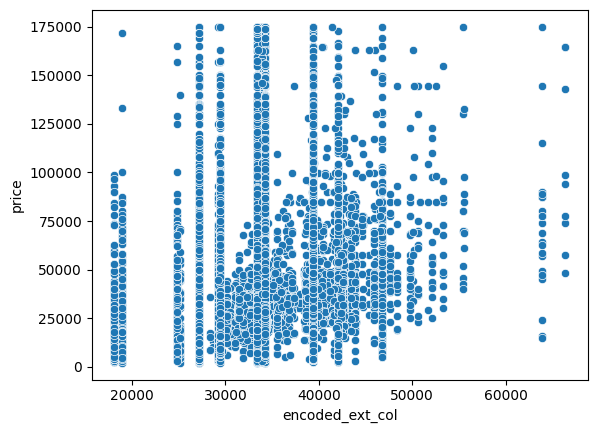

In [216]:
sns.scatterplot(data=train_df,x='encoded_ext_col',y='price')

<Axes: >

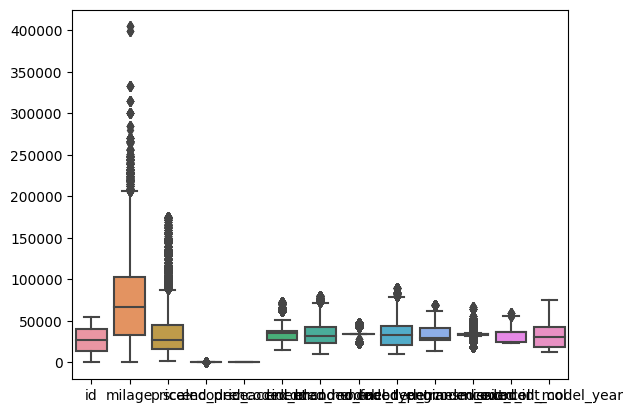

In [217]:
sns.boxplot(data=train_df)

In [218]:
sns.scatterplot(data=train_df,x='price',y='milage') #looks there are outliers in milage column
sns.kdeplot(train_df.milage)

<Axes: xlabel='price', ylabel='milage'>

In [219]:
#lets check outlier of milage varibale mathmatically using robust scaler as it has many oulier and is rightly skewed
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
train_df['scaled_milage']=scaler.fit_transform(train_df.milage.values.reshape(-1,1))
train_df['scaled_milage'].describe()


count   53452.00
mean        0.09
std         0.73
min        -0.96
25%        -0.48
50%         0.00
75%         0.52
max         4.87
Name: scaled_milage, dtype: float64

In [220]:
train_df['scaled_milage'][train_df['scaled_milage']>2].shape  #let keep thrshold as 2 nand remove all prices values from dataframe where price is > 5
train_df=train_df.drop(index=train_df[train_df['scaled_milage']>2].index)
train_df.shape

(52714, 14)

In [221]:

train_df.shape

(52714, 14)

In [222]:
#save the cleaned and encoded df to a csv
#train_df.to_csv('carPrice_encoded_train',index=False)
train_df=pd.read_csv('carPrice_encoded_train')

In [223]:
#split the dataset into train , test and vaidation(hold out sample)
train_data=train_df.sample(frac=0.8,random_state=2024)
validation_data=train_df.drop(train_data.index)

X=train_data.drop(columns=['id','price','scaled_price','scaled_milage'])
y=train_data.price

<Axes: >

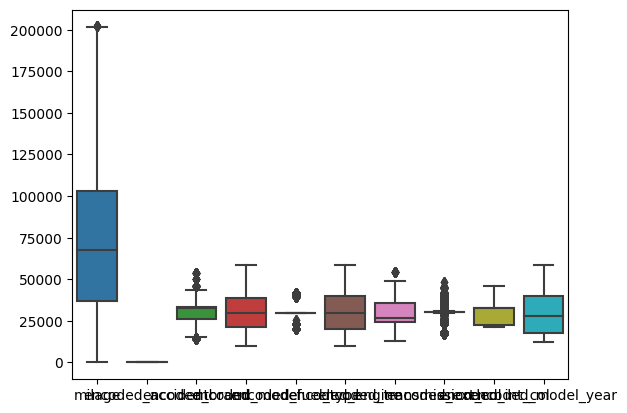

In [224]:
sns.boxplot(X)

<Axes: xlabel='price', ylabel='Count'>

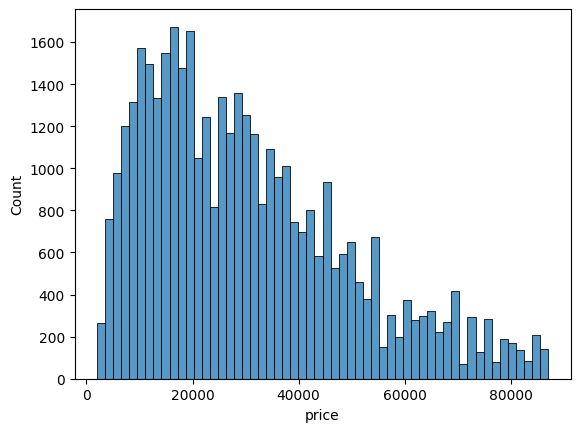

In [225]:
sns.histplot(y)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>8.Model building</h2>
</div>

In [226]:
#train the model on entire train dataset and features
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import statsmodels.formula.api as smf

In [227]:
X=sm.add_constant(X)

In [228]:
X.head()

const  milage  encoded_accident  encoded_brand  encoded_model  \
42934   1.00  117200                 1       33367.43       31068.54   
35032   1.00   78000                 1       32628.39       38633.71   
8161    1.00   18000                 0       33367.43       52118.53   
11826   1.00  185000                 1       17943.90       22878.09   
3988    1.00   62930                 0       13860.17       13055.74   

       encoded_fuel_type  encoded_engine  encoded_transmission  \
42934           29726.61        29830.15              35726.65   
35032           29726.61        22774.87              23181.58   
8161            29726.61        54342.57              39800.54   
11826           29726.61        23762.27              16415.57   
3988            29726.61        13848.64              24083.86   

       encoded_ext_col  encoded_int_col  encoded_model_year  
42934         30133.13         22194.35            15066.73  
35032         24833.41         32465.41            22037.37  
8161          30133.13         32465.41            48196.48  
11826         30530.37         22194.35            15066.73  
3988          30133.13         21465.18            14983.49

In [229]:
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     6467.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:27:32   Log-Likelihood:            -4.3436e+05
No. Observations:               40224   AIC:                         8.688e+05
Df Residuals:                   40213   BIC:                         8.688e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -145.7658 

#### Inference
* all the feature have p-value smaller than 0.05 which make them statifically significant

In [230]:
#lets check multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature_name']=X.columns
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif

feature_name    vif
0                  const 260.55
1                 milage   2.04
2       encoded_accident   1.10
3          encoded_brand   1.29
4          encoded_model   4.36
5      encoded_fuel_type   1.06
6         encoded_engine   4.78
7   encoded_transmission   1.49
8        encoded_ext_col   1.09
9        encoded_int_col   1.15
10    encoded_model_year   2.63

#### Inference
* there is no multicollinearity between variables , other than Encoded_engine

In [231]:
#lets drop the encoded engine and see the model
X_new=X.drop(columns=['encoded_fuel_type','encoded_int_col','encoded_ext_col','encoded_engine'])

In [232]:
# mod=smf.ols(formula='price ~ milage + encoded_engine + encoded_transmission+ encoded_brand + encoded_model + encoded_model_year + encoded_int_col',data=X).fit()
# print(mod.summary())

In [233]:
model=sm.OLS(y,X_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:28:06   Log-Likelihood:            -4.3489e+05
No. Observations:               40224   AIC:                         8.698e+05
Df Residuals:                   40217   BIC:                         8.698e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   41.6100 

In [234]:
X.head()

const  milage  encoded_accident  encoded_brand  encoded_model  \
42934   1.00  117200                 1       33367.43       31068.54   
35032   1.00   78000                 1       32628.39       38633.71   
8161    1.00   18000                 0       33367.43       52118.53   
11826   1.00  185000                 1       17943.90       22878.09   
3988    1.00   62930                 0       13860.17       13055.74   

       encoded_fuel_type  encoded_engine  encoded_transmission  \
42934           29726.61        29830.15              35726.65   
35032           29726.61        22774.87              23181.58   
8161            29726.61        54342.57              39800.54   
11826           29726.61        23762.27              16415.57   
3988            29726.61        13848.64              24083.86   

       encoded_ext_col  encoded_int_col  encoded_model_year  
42934         30133.13         22194.35            15066.73  
35032         24833.41         32465.41            22037.37  
8161          30133.13         32465.41            48196.48  
11826         30530.37         22194.35            15066.73  
3988          30133.13         21465.18            14983.49

In [235]:
import scipy.optimize
def mahalanobis_distance(X=None,data=None,cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu=X-np.mean(data)
    if not cov:
        cov=np.cov(data.values.T)
    inv_covmat=scipy.linalg.inv(cov)
    left_term=np.dot(x_minus_mu,inv_covmat)
    mahal=np.dot(left_term,x_minus_mu.T)
    return mahal.diagonal()
    
        
    


C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\numpy\core\fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


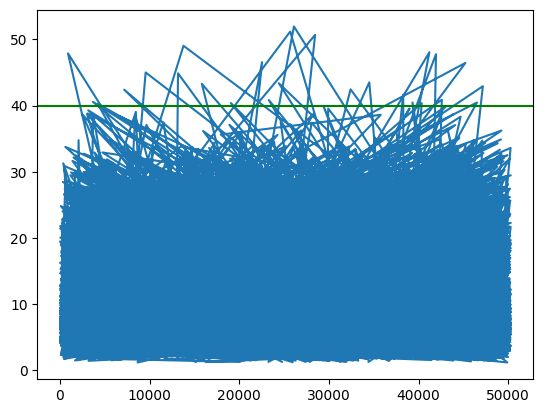

In [87]:
# X_data_for_mahalonbix=X.drop(columns='const')
# X_data_for_mahalonbix['mahalanobis']=mahalanobis_distance(X=X_data_for_mahalonbix,data=X_data_for_mahalonbix)
# X_data_for_mahalonbix.mahalanobis.plot()
# plt.axhline(4*np.mean(X_data_for_mahalonbix.mahalanobis),color='g')


In [236]:
#X_new= X_data_for_mahalonbix.drop(index=X_data_for_mahalonbix[X_data_for_mahalonbix.mahalanobis>35].index)


In [237]:
# y=y.drop(index=X_data_for_mahalonbix[X_data_for_mahalonbix.mahalanobis>35].index)
# y.shape

In [238]:
#X_new=sm.add_constant(X_new)
model=sm.OLS(y,X_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:28:50   Log-Likelihood:            -4.3489e+05
No. Observations:               40224   AIC:                         8.698e+05
Df Residuals:                   40217   BIC:                         8.698e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   41.6100 

In [134]:
# #detecting outliersusing cooks distance
# np.set_printoptions(suppress=True)

# #create insatccne of influence
# influential=model.get_influence()

# cooks= influential.cooks_distance
# print(np.mean(cooks[0]))

2.734584445492603e-05


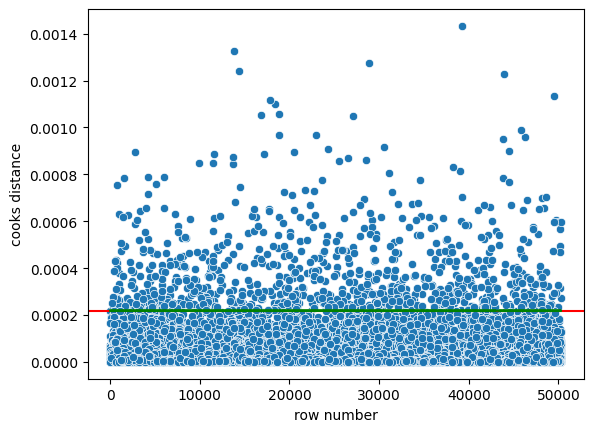

In [142]:
# #draw a plot for cooks distance
# ax1=sns.scatterplot(x=X_new.index,y=cooks[0])
# ax1.axhline(8*np.mean(cooks[0]),color='red')
# plt.xlabel("row number")
# plt.ylabel("cooks distance")
# mean_cooks=np.nanmean(cooks[0])
# mean_cooks_list=[8*mean_cooks for i in X_new.index] ##influentials are those that are at least 8times the mean cooks distance 
# plt.plot(X_new.index,mean_cooks_list,color='green')

In [143]:
# influential_points=X_new.index[cooks[0]>8*mean_cooks]
# len(influential_points) #remove the extreme infuential points

860

In [147]:
# X_new=X_new.drop(index=influential_points,axis=0)
# X_new.shape
# y=y.drop(index=influential_points,axis=0)

In [150]:
model=sm.OLS(y,X_new).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     9997.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:10:30   Log-Likelihood:            -4.1978e+05
No. Observations:               39300   AIC:                         8.396e+05
Df Residuals:                   39291   BIC:                         8.397e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1368.6743 

In [239]:
model.params

const                    41.61
milage                   -0.10
encoded_accident       1456.98
encoded_brand             0.14
encoded_model             0.60
encoded_transmission      0.08
encoded_model_year        0.38
dtype: float64

In [240]:
validation_ds=validation_data[['milage', 'encoded_accident', 'encoded_brand', 'encoded_model',
       'encoded_transmission', 'encoded_model_year']]
#validation_ds=np.log1p(validation_ds)
validation_ds=sm.add_constant(validation_ds)

In [241]:
y_pred=model.predict(validation_ds)
y_pred

1       15048.00
10      38709.43
13      20687.63
19      15461.02
26      17038.25
          ...   
50230   21193.03
50238   22745.43
50261   47921.58
50268   43168.20
50270   15759.17
Length: 10056, dtype: float64

In [242]:
validation_data.price

1         8250
10       49900
13       23500
19        9500
26       16999
         ...  
50230    14000
50238    16000
50261    49900
50268    31000
50270     7200
Name: price, Length: 10056, dtype: int64

In [243]:
temp_df=pd.DataFrame({"actual":validation_data.price,"predicted":y_pred})
temp_df

actual  predicted
1        8250   15048.00
10      49900   38709.43
13      23500   20687.63
19       9500   15461.02
26      16999   17038.25
...       ...        ...
50230   14000   21193.03
50238   16000   22745.43
50261   49900   47921.58
50268   31000   43168.20
50270    7200   15759.17

[10056 rows x 2 columns]

#since omnibus is quite high means errors are not normally distributed 


Text(0, 0.5, 'residuals')

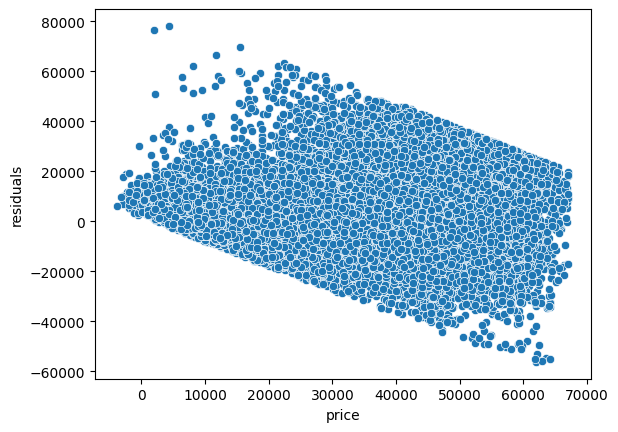

In [244]:
# model=smf.ols(formula='price ~ milage + encoded_accident + encoded_brand + encoded_model + encoded_ext_col + encoded_model_year',data=
model.resid.mean()
res_id=model.resid
sns.scatterplot(x=model.fittedvalues,y=res_id)
plt.xlabel("price")
plt.ylabel("residuals")

Text(0, 0.5, 'residuals')

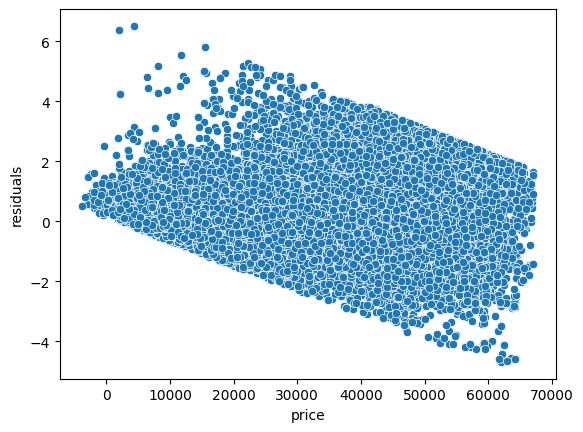

In [245]:
res_id_standrdized = (res_id-res_id.mean())/res_id.std()
sns.scatterplot(x=model.fittedvalues,y=res_id_standrdized)
plt.xlabel("price")
plt.ylabel("residuals")

In [246]:
#lets use repeated k fold validation to train the model with X-ne_scaled and y
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,mean_squared_error
def build_model_ols(X,y):
    rkf=RepeatedKFold(n_repeats=3,n_splits=5,random_state=2023)
    mse=[]
    mape=[]
    for train_index,test_index in (rkf.split(X)):
        #X_n_scaled.iloc[test_index,'Kfold']=fold #this will add a new column with fold number as value    
        X_train,X_test=X.iloc[train_index],X.iloc[test_index]    
        y_train,y_test=y.iloc[train_index],y.iloc[test_index]
        model=sm.OLS(y_train,X_train).fit()
        y_pred= model.predict(X_test)
        mse_scores=mean_squared_error(y_test,y_pred).round(2)
        mape_scores=mean_absolute_percentage_error(y_test,y_pred).round(2)
        #print(model.summary())
        mse.append(mse_scores)
        #print(mse)
        mape.append(mape_scores)
        #print(mape)
    return mse,mape,model


def compute_eval_metrics(y_true,y_pred):
    mse=mean_squared_error(y_true,y_pred)
    mape=mean_absolute_percentage_error(y_true,y_pred)
    return mse,mape




    
    
    
    
    

In [247]:
#create a dataset to store model trained and their accuracy
df_model_performance=pd.DataFrame(columns=['model_name','cv validation','adj R2','avg MSE','avg MAPE','comments'])

In [248]:
mse,mape,moedl=build_model_ols(X_new,y)

In [249]:
mape

[0.39,
 0.41,
 0.41,
 0.39,
 0.39,
 0.4,
 0.41,
 0.39,
 0.41,
 0.39,
 0.4,
 0.39,
 0.4,
 0.4,
 0.4]

### Polynomial regression model 

In [3708]:
X_poly=X_new.copy()
X_poly.shape

(37820, 8)

In [3709]:
validation_ds.shape

(10034, 8)

In [3710]:
#lets us polynomial regresion model  to understand non linear reletionship

from sklearn.preprocessing import PolynomialFeatures

polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)
poly_features=polynomial_converter.fit_transform(X_poly)

poly_features.shape


(37820, 44)

In [3711]:
validation_ds_poly=polynomial_converter.transform(validation_ds)
validation_ds_poly.shape

(10034, 44)

In [3712]:
poly_features[0]

array([1.00000000e+00, 1.92000000e+04, 1.00000000e+00, 3.27836925e+04,
       4.43129694e+04, 4.31601120e+04, 3.57266512e+04, 4.81964795e+04,
       1.00000000e+00, 1.92000000e+04, 1.00000000e+00, 3.27836925e+04,
       4.43129694e+04, 4.31601120e+04, 3.57266512e+04, 4.81964795e+04,
       3.68640000e+08, 1.92000000e+04, 6.29446895e+08, 8.50809012e+08,
       8.28674151e+08, 6.85951703e+08, 9.25372406e+08, 1.00000000e+00,
       3.27836925e+04, 4.43129694e+04, 4.31601120e+04, 3.57266512e+04,
       4.81964795e+04, 1.07477049e+09, 1.45274276e+09, 1.41494784e+09,
       1.17125154e+09, 1.58005856e+09, 1.96363925e+09, 1.91255272e+09,
       1.58315400e+09, 2.13572912e+09, 1.86279527e+09, 1.54196627e+09,
       2.08016545e+09, 1.27639360e+09, 1.72189881e+09, 2.32290064e+09])

In [3713]:
model=sm.OLS(y,poly_features).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     2973.
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:51:41   Log-Likelihood:                -14819.
No. Observations:               37820   AIC:                         2.971e+04
Df Residuals:                   37785   BIC:                         3.001e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2093      0.039    107.541      0.0

In [3714]:
y_pred=model.predict(validation_ds_poly)
np.expm1(y_pred)

array([13474.81037014, 30747.81759742, 15590.46678977, ...,
       45856.3294023 , 45600.4615499 , 13843.85228817])

In [3715]:
mse,mape=compute_eval_metrics(validation_data.price,np.expm1(y_pred))
mape

0.32576494474267376

In [3716]:
temf_df=pd.DataFrame({"actual":validation_data.price,"predicted":np.expm1(y_pred)})
temf_df

actual  predicted
1        8250   13474.81
10      49900   30747.82
13      23500   15590.47
19       9500   14858.15
26      16999   15567.98
...       ...        ...
50230   14000   18607.95
50238   16000   17105.89
50261   49900   45856.33
50268   31000   45600.46
50270    7200   13843.85

[10034 rows x 2 columns]

In [3600]:
model.df_model

34.0

### Log Tranformation

In [3662]:
X.head()

C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


const  milage  encoded_accident  encoded_brand  encoded_model  \
30925   1.00   19200                 1       32783.69       44312.97   
17075   1.00   25000                 1       33367.43       52118.53   
30050   1.00   67483                 1       38460.86       38929.47   
19409   1.00   89000                 1       33367.43       25005.40   
38587   1.00   13400                 1       25992.02       26841.92   

       encoded_fuel_type  encoded_engine  encoded_transmission  \
30925           29726.61        43160.11              35726.65   
17075           29726.61        50956.27              35726.65   
30050           29726.61        36007.29              23181.58   
19409           29726.61        21649.12              35726.65   
38587           29726.61        34112.67              24083.86   

       encoded_ext_col  encoded_int_col  encoded_model_year  
30925         38513.60         21465.18            48196.48  
17075         30133.13         32465.41            32031.60  
30050         23124.66         22194.35            44607.37  
19409         30133.13         32465.41            27901.48  
38587         24833.41         32465.41            52406.02

In [3663]:
y.head()

30925    57999
17075    50000
30050    46500
19409    26000
38587    33499
Name: price, dtype: int64

In [3664]:
#lets standardize the x features as well 
X_n_scaled=np.log1p(X_new)
y=np.log1p(y)
#X_n_scaled=X_new.copy()

In [3665]:
X_n_scaled=X_n_scaled.drop(columns=['const'])
X_n_scaled=sm.add_constant(X_n_scaled)
X_n_scaled

const  milage  encoded_accident  encoded_brand  encoded_model  \
30925   1.00    9.86              0.69          10.40          10.70   
17075   1.00   10.13              0.69          10.42          10.86   
30050   1.00   11.12              0.69          10.56          10.57   
19409   1.00   11.40              0.69          10.42          10.13   
38587   1.00    9.50              0.69          10.17          10.20   
...      ...     ...               ...            ...            ...   
43274   1.00   11.58              0.69          10.18           9.80   
46436   1.00   10.81              0.69           9.67          10.03   
43446   1.00    9.91              0.69          10.17          10.78   
19533   1.00   11.69              0.00          10.40          10.24   
33929   1.00   11.37              0.69          10.18           9.54   

       encoded_engine  encoded_transmission  encoded_model_year  
30925           10.67                 10.48               10.78  
17075           10.84                 10.48               10.37  
30050           10.49                 10.05               10.71  
19409            9.98                 10.48               10.24  
38587           10.44                 10.09               10.87  
...               ...                   ...                 ...  
43274            9.99                 10.09               10.00  
46436           10.19                 10.09               10.78  
43446           10.75                 10.48               10.78  
19533           10.46                 10.05               10.16  
33929            9.61                 10.09                9.76  

[37820 rows x 8 columns]

In [3666]:
y.shape

(37820,)

In [3667]:
#X_n_scaled=X_n_scaled.drop(columns='encoded_engine')

In [3668]:
model=sm.OLS(y,X_n_scaled).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Thu, 13 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:28:17   Log-Likelihood:                -16693.
No. Observations:               37820   AIC:                         3.340e+04
Df Residuals:                   37812   BIC:                         3.347e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.5864 

Text(0, 0.5, 'errors')

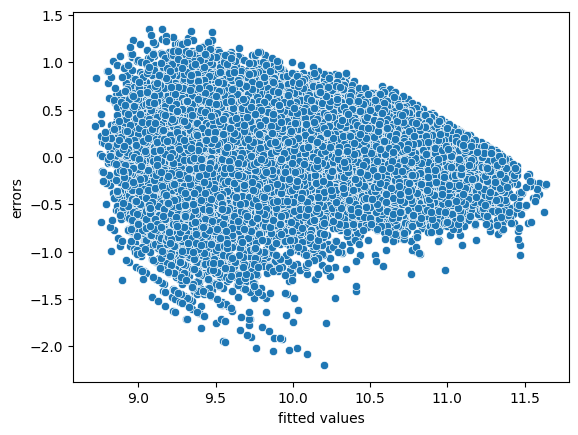

In [3669]:
res_id=model.resid
sns.scatterplot(x=model.fittedvalues,y=res_id)
plt.xlabel("fitted values")
plt.ylabel("errors")


In [3671]:
#lets check multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature_name']=X_n_scaled.columns
vif['vif']=[variance_inflation_factor(X_n_scaled,i) for i in range(X_n_scaled.shape[1])]
vif

feature_name     vif
0                 const 4169.27
1                milage    1.70
2      encoded_accident    1.09
3         encoded_brand    1.30
4         encoded_model    4.17
5        encoded_engine    4.58
6  encoded_transmission    1.47
7    encoded_model_year    2.68

###  Inference
* above is model with best adjusted r2,lets train on repeatedfold data
  

In [3672]:
mse,mape,model=build_model_ols(X_n_scaled,y)

In [3673]:
mape

[0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03,
 0.03]

In [3674]:
# validation_ds=validation_data[['encoded_accident', 'encoded_brand','encoded_model_year','encoded_model','milage','encoded_ext_col']]
# #validation_ds=np.log1p(validation_ds)
# validation_ds=sm.add_constant(validation_ds)

In [3675]:
validation_ds.head()

const  milage  encoded_accident  encoded_brand  encoded_model  \
1    1.00   80000                 1       33367.43       15475.93   
10   1.00   92728                 1       32783.69       45835.88   
13   1.00   93500                 1       34850.10       22800.81   
19   1.00  106000                 0       24466.55       17917.24   
26   1.00  111000                 1       32628.39       16901.95   

    encoded_engine  encoded_transmission  encoded_model_year  
1         21649.12              26669.29            13874.70  
10        34947.73              24083.86            32031.60  
13        19261.16              24083.86            20646.90  
19        19557.26              23181.58            25892.62  
26        19141.22              24083.86            25892.62

In [3676]:
y_log_pred=model.predict(validation_ds)
y_log_pred

1       18432.47
10      40310.76
13      21788.14
19      20207.23
26      20462.37
          ...   
50230   26543.86
50238   23967.56
50261   54473.25
50268   51188.17
50270   18610.50
Length: 10034, dtype: float64

In [3677]:
y_log_pred.shape

(10034,)

In [3678]:
temf_df=pd.DataFrame({"actual":validation_data.price,"predicted":y_log_pred})

In [3679]:
temf_df

actual  predicted
1        8250   18432.47
10      49900   40310.76
13      23500   21788.14
19       9500   20207.23
26      16999   20462.37
...       ...        ...
50230   14000   26543.86
50238   16000   23967.56
50261   49900   54473.25
50268   31000   51188.17
50270    7200   18610.50

[10034 rows x 2 columns]

In [3680]:
mse,mape=compute_eval_metrics(validation_data.price,(y_log_pred))
mape

0.49343317558795313

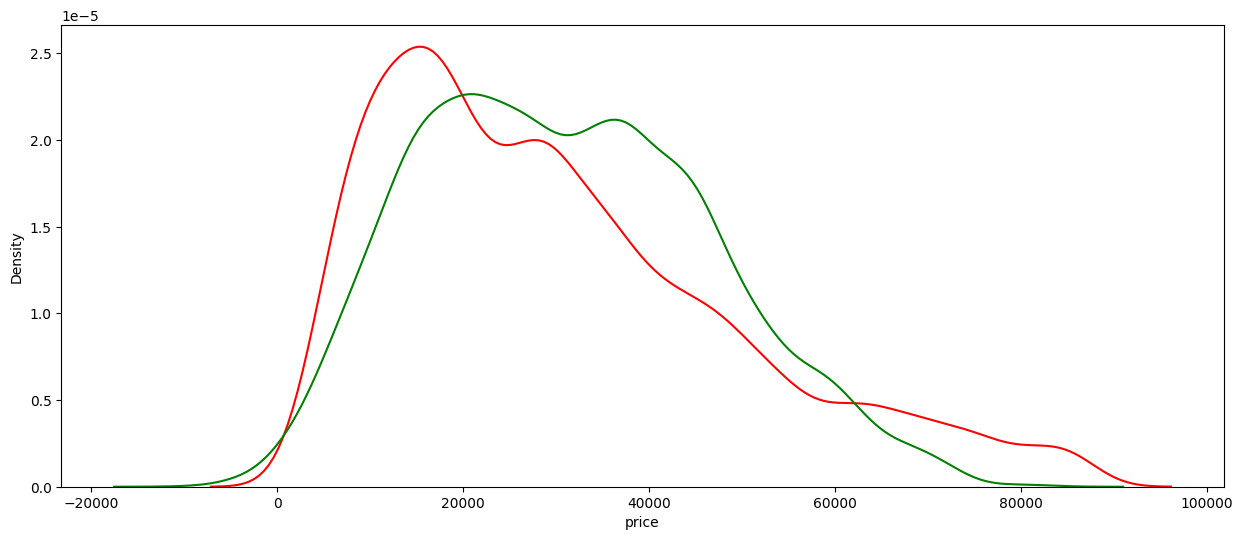

In [3681]:
#distribution plot of y_test(y_actual) vs y_hat
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,6))
sns.kdeplot(validation_data.price,color='r',label='Actual value',ax=ax)
sns.kdeplot(prediction_on_validation,color='g',label='Fitted value',ax=ax)
plt.show()

In [3717]:
#lets use ridge regression to handle overfitting issue

from sklearn.linear_model import Ridge
param_grid={'alpha':[0.1,1,10,100,1000]}
ridge=Ridge()
gs=GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5,scoring='r2')


In [3718]:
gs.fit(poly_features,y)

C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.49495e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.47497e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.48389e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.47171e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000]}, scoring='r2')

In [3719]:
gs.best_params_

{'alpha': 1000}

In [3720]:
model=gs.best_estimator_
model.fit(poly_features,y)

C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.98105e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=1000)

In [3721]:
y_log_pred=model.predict(validation_ds_poly)
y_log_pred

array([ 9.50689098, 10.33450241,  9.6546125 , ..., 10.73383494,
       10.72779911,  9.53258146])

In [3722]:
temf_df=pd.DataFrame({"actual":validation_data.price,"predicted":np.expm1(y_log_pred)})
temf_df

actual  predicted
1        8250   13451.11
10      49900   30775.37
13      23500   15592.55
19       9500   14896.00
26      16999   15585.59
...       ...        ...
50230   14000   18706.88
50238   16000   17077.47
50261   49900   45881.31
50268   31000   45605.21
50270    7200   13801.17

[10034 rows x 2 columns]

In [3055]:
df_model_performance=df_model_performance.append({"model_name":"OLS","cv validation":"RepeatedKfold","adj R2":model.rsquared_adj,"avg MSE":np.average(mse),"avg MAPE":np.average(mape),"comments":"log transformed"},ignore_index=True)

C:\Users\maste\AppData\Local\Temp\ipykernel_15024\1159895660.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_performance=df_model_performance.append({"model_name":"OLS","cv validation":"RepeatedKfold","adj R2":model.rsquared_adj,"avg MSE":np.average(mse),"avg MAPE":np.average(mape),"comments":"log transformed"},ignore_index=True)


##### BoxCox Transformation


In [2086]:
#looks like funnel shape pattern shown my errors wrt Y variable, means there is hetroscedasticity present
#lets perform og transformation
from scipy.stats import boxcox
from scipy.special import inv_boxcox
# y=np.log(y)
df_transformed=train_data.copy()
fitted_data,fitted_lambda=boxcox(df_transformed['price'])
df_transformed['price_boxcox']=fitted_data


In [2087]:
df_transformed.shape

(43093, 14)

<Axes: >

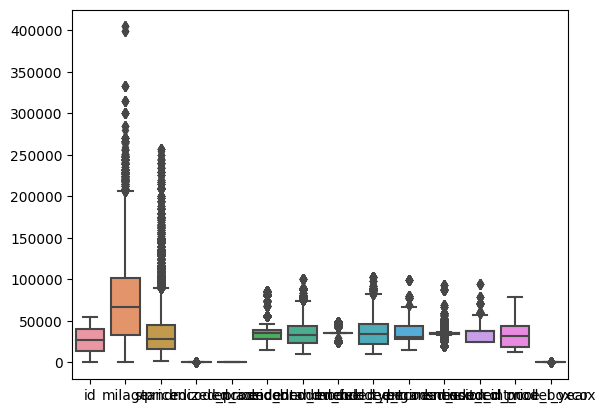

In [2088]:
sns.boxplot(data=df_transformed)

In [2089]:
#lets remove the outliers from milage column
Q1=df_transformed.milage.quantile(0.25)
Q3=df_transformed.milage.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_transformed_outlier_removed=df_transformed[(df_transformed['milage']>=lower_bound) &(df_transformed['milage']<=upper_bound)]

In [2090]:
df_transformed_outlier_removed.shape

(42529, 14)

In [2091]:
X_boxcox=df_transformed_outlier_removed[['milage', 'encoded_accident', 'encoded_brand',
       'encoded_model', 'encoded_ext_col', 'encoded_model_year']]
#X_boxcos=X.apply(lambda x:boxcox(x+1)[0] if np.all(x>0) else x)

<Axes: >

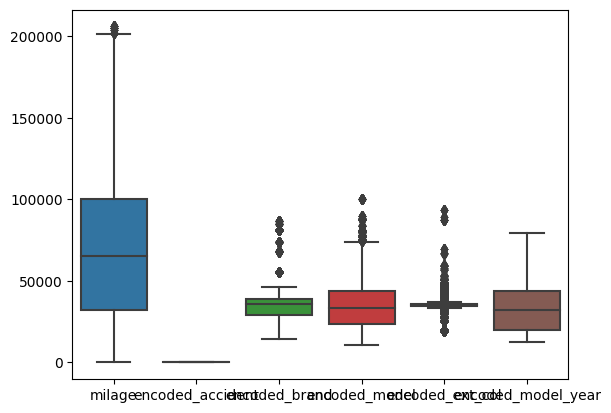

In [2092]:
sns.boxplot(data=X_boxcox)

In [2093]:
# X_boxcos.head()

In [2094]:
X_boxcox=sm.add_constant(X)
y_boxcox=df_transformed_outlier_removed.price_boxcox
y_boxcox

35751   14.72
42414   17.01
40000   14.57
26020   15.07
53469   12.95
         ... 
8321    14.49
24266   13.44
4363    12.09
12833   15.05
5933    15.05
Name: price_boxcox, Length: 42529, dtype: float64

In [2095]:
X_boxcox.shape

(42529, 7)

In [2096]:
y_boxcox.shape

(42529,)

In [2097]:
# model_boxcos=smf.ols(formula='price_boxcox ~ milage + encoded_accident + encoded_brand + encoded_model + encoded_ext_col + encoded_model_year',data=df_transformed) 
# print(model.summary())
model=sm.OLS(y_boxcox,X_boxcox).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                 1.172e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:41:33   Log-Likelihood:                -58227.
No. Observations:               42529   AIC:                         1.165e+05
Df Residuals:                   42522   BIC:                         1.165e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.7462      0

In [2098]:
#detecting outliersusing cooks distance
np.set_printoptions(suppress=True)

#create insatccne of influence
influential=model.get_influence()

cooks= influential.cooks_distance
print(np.mean(cooks[0]))

2.8987483409485437e-05


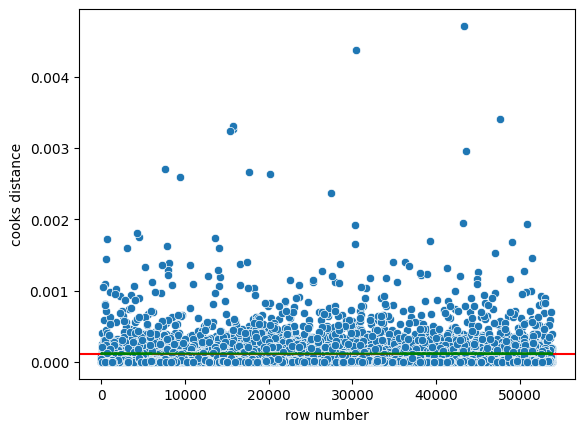

In [2099]:
#draw a plot for cooks distance
ax1=sns.scatterplot(x=X_boxcox.index,y=cooks[0])
ax1.axhline(4*np.mean(cooks[0]),color='red')
plt.xlabel("row number")
plt.ylabel("cooks distance")
mean_cooks=np.nanmean(cooks[0])
mean_cooks_list=[4*mean_cooks for i in X.index] ##influentials are those that are at least 4times the mean cooks distance 
plt.plot(X.index,mean_cooks_list,color='green')

In [2100]:
influential_points=X_boxcox.index[cooks[0]>4*mean_cooks]
len(influential_points) #remove the extreme infuential points

2208

In [2101]:
X=X_boxcox.drop(index=influential_points,axis=0)
y=y_boxcox.drop(index=influential_points,axis=0)

In [2102]:
X.head()

const  milage  encoded_accident  encoded_brand  encoded_model  \
35751   1.00   96000                 1       34746.24       26466.92   
42414   1.00   17500                 1       38630.89       57815.61   
40000   1.00   49700                 1       38630.89       35344.62   
26020   1.00   44362                 1       28538.22       58934.63   
53469   1.00  100331                 1       29203.86       19070.14   

       encoded_ext_col  encoded_model_year  
35751         34605.58            32127.73  
42414         35603.89            43877.38  
40000         35198.25            36510.76  
26020         43662.12            53133.45  
53469         35198.25            17229.96

In [2126]:
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           price_boxcox   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 1.788e+04
Date:                Mon, 10 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:58:05   Log-Likelihood:                -45748.
No. Observations:               40321   AIC:                         9.151e+04
Df Residuals:                   40314   BIC:                         9.157e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.7808      0

##### Inference
* with boxcox transformation and removing outliers using cooks distance adjusted r2 improved from 0.66 to 0.73

In [2127]:
# lets build model on boxcox transformed data, sicne we have use boxcox on y variavle ,predictions need to be done on inverse_boxcox values
mse,mape,model=build_model_ols(X,y)
mape

[0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04,
 0.04]

In [2128]:
y_pred=model.predict(validation_ds)
y_pred

1       13.54
10      15.77
13      15.35
19      16.38
26      16.17
         ... 
53825   11.91
53828   13.06
53844   15.80
53851   14.93
53853   15.41
Length: 10773, dtype: float64

In [2129]:
y_=inv_boxcox(y_pred,fitted_lambda)
y_

1       15272.93
10      47167.49
13      38372.34
19      63146.25
26      57030.24
          ...   
53825    6323.85
53828   11863.35
53844   47812.15
53851   31130.51
53853   39538.22
Length: 10773, dtype: float64

In [2130]:
temp_df=pd.DataFrame({"actual":validation_data.price,"predicted":y_})
temp_df

actual  predicted
1        8250   15272.93
10     124995   47167.49
13      28250   38372.34
19     234000   63146.25
26      89995   57030.24
...       ...        ...
53825   17550    6323.85
53828   12749   11863.35
53844   49900   47812.15
53851   40995   31130.51
53853   31000   39538.22

[10773 rows x 2 columns]

In [2124]:
mse,mape=compute_eval_metrics(validation_data.price,y_)
mape

0.39148671633186094

In [1478]:
df_model_performance=df_model_performance.append({"model_name":"OLS","cv validation":"RepeatedKfold","adj R2":".73","avg MSE":np.average(mse),"avg MAPE":np.average(mape),"comments":"boxcox transformed"},ignore_index=True)

C:\Users\maste\AppData\Local\Temp\ipykernel_15024\3824549562.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_performance=df_model_performance.append({"model_name":"OLS","cv validation":"RepeatedKfold","adj R2":".73","avg MSE":np.average(mse),"avg MAPE":np.average(mape),"comments":"boxcox transformed"},ignore_index=True)


#### RANSAC= Random sampling Consensus

In [263]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [264]:
X=X_new.copy()
X.shape

(40224, 7)

In [265]:
y.shape

(40224,)

In [266]:
validation_ds.shape

(10056, 7)

In [278]:
X=X.drop(columns='const')

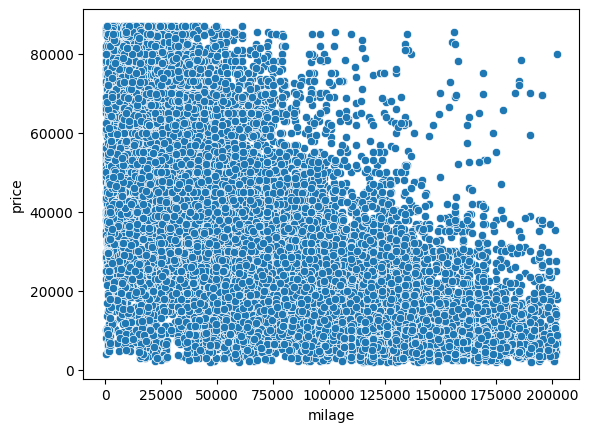

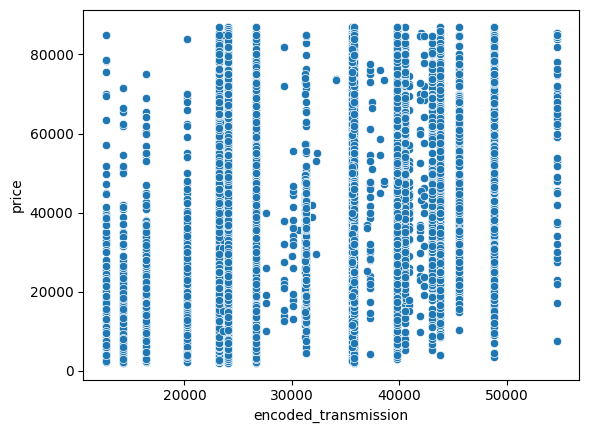

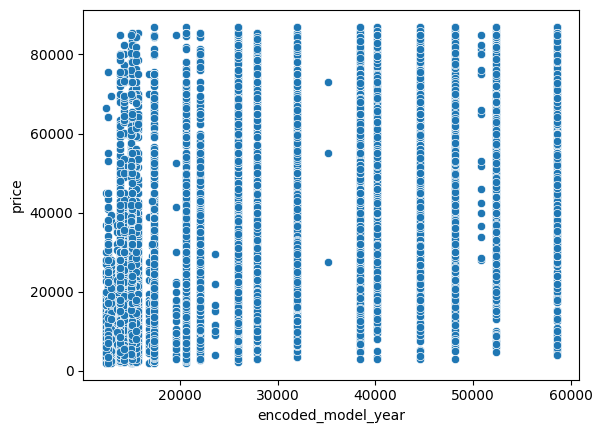

In [283]:
for col in X.columns:
    sns.scatterplot(x=X[col],y=y)
    plt.show()

In [284]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

In [341]:
base_model=LinearRegression()
ransac=RANSACRegressor(base_model,min_samples=2000,residual_threshold=10000,random_state=2024)
ransac.fit(X_train,y_train)


RANSACRegressor(estimator=LinearRegression(), min_samples=2000,
                random_state=2024, residual_threshold=10000)

In [347]:
ransac.feature_names_in_

array(['milage', 'encoded_accident', 'encoded_brand', 'encoded_model',
       'encoded_transmission', 'encoded_model_year'], dtype=object)

In [342]:
y_pred=ransac.predict(X_test)
y_pred

array([41269.03838376, 18179.40108171, 39385.46332902, ...,
       29504.40007592, 48746.24701383, 25404.05062157])

In [343]:
r2=r2_score(y_test,y_pred)
r2

0.5868973708037584

In [344]:
mape=mean_absolute_percentage_error(y_test,y_pred)
mape

0.3698750426124731

In [348]:
validation_data.columns

Index(['id', 'milage', 'price', 'scaled_price', 'encoded_accident',
       'encoded_brand', 'encoded_model', 'encoded_fuel_type', 'encoded_engine',
       'encoded_transmission', 'encoded_ext_col', 'encoded_int_col',
       'encoded_model_year', 'scaled_milage'],
      dtype='object')

In [353]:
validation_ds.columns

Index(['milage', 'encoded_accident', 'encoded_brand', 'encoded_model',
       'encoded_ext_col', 'encoded_model_year'],
      dtype='object')

In [354]:
validation_ds=validation_data.drop(columns=['id','price','scaled_price','scaled_milage','encoded_transmission','encoded_engine','encoded_int_col','encoded_fuel_type'])
#validation_ds=sm.add_constant(validation_ds)
#prdection_on_train=model.predict(X)

prediction_on_validation=ransac.predict(validation_ds)

C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- encoded_ext_col
Feature names seen at fit time, yet now missing:
- encoded_transmission

  warnings.warn(message, FutureWarning)


In [357]:
mse,mape=compute_eval_metrics(validation_data.price,prediction_on_validation)
mape

0.3663230175643204

In [358]:
temp_df=pd.DataFrame({"actual":validation_data.price,"predicted":prediction_on_validation})
temp_df

actual  predicted
1        8250   13618.48
10      49900   35761.97
13      23500   19430.39
19       9500   16301.21
26      16999   17328.59
...       ...        ...
50230   14000   21827.86
50238   16000   21315.70
50261   49900   42672.07
50268   31000   38290.88
50270    7200   14753.10

[10056 rows x 2 columns]

### Robust Regression 

### ElasticNet regression 

In [2279]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error


In [2280]:
df_transformed=train_data.copy()


In [2281]:
df_transformed.head()

id  milage  price  standrdized_price  encoded_accident  \
35751  36027   96000  27950              -0.15                 1   
42414  42737   17500  85000               0.63                 1   
40000  40306   49700  26000              -0.18                 1   
26020  26227   44362  33290              -0.08                 1   
53469  53875  100331  11200              -0.38                 1   

       encoded_brand  encoded_model  encoded_fuel_type  encoded_engine  \
35751       34746.24       26466.92           34967.14        23505.61   
42414       38630.89       57815.61           43087.57        55613.29   
40000       38630.89       35344.62           34967.14        36509.38   
26020       28538.22       58934.63           34967.14        48790.05   
53469       29203.86       19070.14           34967.14        15270.74   

       encoded_transmission  encoded_ext_col  encoded_int_col  \
35751              52793.82         34605.58         24783.87   
42414              27537.34         35603.89         37967.72   
40000              47952.14         35198.25         24783.87   
26020              48272.35         43662.12         52790.53   
53469              27537.34         35198.25         24783.87   

       encoded_model_year  
35751            32127.73  
42414            43877.38  
40000            36510.76  
26020            53133.45  
53469            17229.96

In [2282]:
df.shape

(43093, 11)

In [2738]:
sns.boxplot(df_transformed)

<Axes: >

In [2283]:
#lets remove the outliers from milage column
Q1=df_transformed.milage.quantile(0.25)
Q3=df_transformed.milage.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_transformed_outlier_removed=df_transformed[(df_transformed['milage']>=lower_bound) &(df_transformed['milage']<=upper_bound)]

In [2284]:
df_transformed_outlier_removed.head()

id  milage  price  standrdized_price  encoded_accident  \
35751  36027   96000  27950              -0.15                 1   
42414  42737   17500  85000               0.63                 1   
40000  40306   49700  26000              -0.18                 1   
26020  26227   44362  33290              -0.08                 1   
53469  53875  100331  11200              -0.38                 1   

       encoded_brand  encoded_model  encoded_fuel_type  encoded_engine  \
35751       34746.24       26466.92           34967.14        23505.61   
42414       38630.89       57815.61           43087.57        55613.29   
40000       38630.89       35344.62           34967.14        36509.38   
26020       28538.22       58934.63           34967.14        48790.05   
53469       29203.86       19070.14           34967.14        15270.74   

       encoded_transmission  encoded_ext_col  encoded_int_col  \
35751              52793.82         34605.58         24783.87   
42414              27537.34         35603.89         37967.72   
40000              47952.14         35198.25         24783.87   
26020              48272.35         43662.12         52790.53   
53469              27537.34         35198.25         24783.87   

       encoded_model_year  
35751            32127.73  
42414            43877.38  
40000            36510.76  
26020            53133.45  
53469            17229.96

In [2285]:
df_transformed_outlier_removed.shape

(42529, 13)

<Axes: >

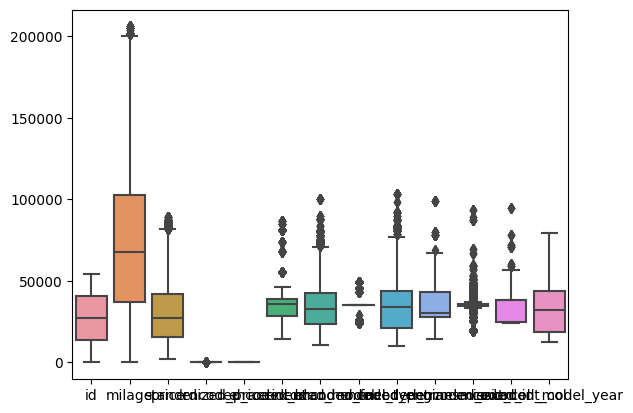

In [2291]:
sns.boxplot(df_transformed_outlier_removed)

In [2288]:
#lets remove the outliers from price column
Q1=df_transformed.price.quantile(0.25)
Q3=df_transformed.price.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_transformed_outlier_removed=df_transformed_outlier_removed[(df_transformed_outlier_removed['price']>=lower_bound) &(df_transformed_outlier_removed['price']<=upper_bound)]

In [2289]:
df_transformed_outlier_removed.shape

(40363, 13)

In [2461]:
X=df_transformed_outlier_removed.drop(columns=['id','price','standrdized_price'])
y=df_transformed_outlier_removed.price

<Axes: >

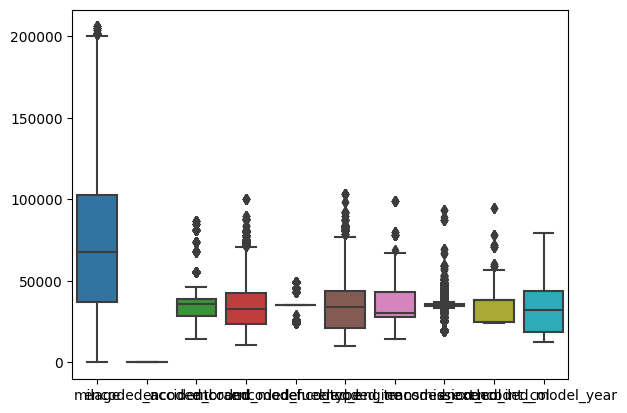

In [2462]:
sns.boxplot(X)

In [2463]:
# #log transformation
# X=np.log1p(X)
# y=np.log1p(y)

In [2464]:
params={"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.1],
       "l1_ratio":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.1]}
en=ElasticNet()
clf=GridSearchCV(estimator=en, param_grid=params,cv=5,return_train_score=True)
clf.fit(X,y)


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.1],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.1]},
             return_train_score=True)

In [2476]:
clf.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.8)

In [2477]:
model=ElasticNet(alpha=0.1,l1_ratio=0.8)
model.fit(X,y)

ElasticNet(alpha=0.1, l1_ratio=0.8)

In [2478]:
X

milage  encoded_accident  encoded_brand  encoded_model  \
35751   96000                 1       34746.24       26466.92   
42414   17500                 1       38630.89       57815.61   
40000   49700                 1       38630.89       35344.62   
26020   44362                 1       28538.22       58934.63   
53469  100331                 1       29203.86       19070.14   
...       ...               ...            ...            ...   
8321    52500                 1       32970.75       28136.07   
24266   89000                 1       21694.98       29514.12   
4363   143095                 1       37528.47       54391.14   
12833    1025                 1       35828.28       26378.70   
5933    24158                 1       38630.89       55423.04   

       encoded_fuel_type  encoded_engine  encoded_transmission  \
35751           34967.14        23505.61              52793.82   
42414           43087.57        55613.29              27537.34   
40000           34967.14        36509.38              47952.14   
26020           34967.14        48790.05              48272.35   
53469           34967.14        15270.74              27537.34   
...                  ...             ...                   ...   
8321            34967.14        33656.11              42718.79   
24266           34967.14        20891.90              24491.58   
4363            34967.14        34438.08              30098.20   
12833           34967.14        29793.62              30098.20   
5933            43087.57        55423.04              47952.14   

       encoded_ext_col  encoded_int_col  encoded_model_year  
35751         34605.58         24783.87            32127.73  
42414         35603.89         37967.72            43877.38  
40000         35198.25         24783.87            36510.76  
26020         43662.12         52790.53            53133.45  
53469         35198.25         24783.87            17229.96  
...                ...              ...                 ...  
8321          40830.99         37967.72            43877.38  
24266         34605.58         37967.72            22113.88  
4363          35603.89         37967.72            15617.88  
12833         30397.83         24136.38            23550.13  
5933          35603.89         37967.72            55645.61  

[40363 rows x 10 columns]

In [2479]:
validation_data

id  milage   price  standrdized_price  encoded_accident  \
1          1   80000    8250              -0.43                 1   
10        10   34920  124995               1.18                 1   
13        13   37000   28250              -0.15                 1   
19        19   14269  234000               2.67                 1   
26        26    6449   89995               0.70                 1   
...      ...     ...     ...                ...               ...   
53825  54232  215000   17550              -0.30                 0   
53828  54235  149000   12749              -0.36                 0   
53844  54251   52375   49900               0.15                 1   
53851  54258   76249   40995               0.02                 0   
53853  54260   28150   31000              -0.11                 1   

       encoded_brand  encoded_model  encoded_fuel_type  encoded_engine  \
1           38630.89       16348.87           34967.14        23393.28   
10          42459.88       53176.30           34967.14        41684.05   
13          32970.75       40440.56           34967.14        33656.11   
19          29203.86       52058.11           34967.14        76177.15   
26          35828.28       45887.72           34967.14        46269.54   
...              ...            ...                ...             ...   
53825       29035.63       17996.91           34967.14        23011.21   
53828       38630.89       22169.01           34967.14        20187.18   
53844       38630.89       64642.92           34967.14        61346.01   
53851       40704.90       39167.29           34967.14        48790.05   
53853       34746.24       44854.28           34967.14        49672.78   

       encoded_transmission  encoded_ext_col  encoded_int_col  \
1                  30098.20         35603.89         37967.72   
10                 27537.34         27671.20         37967.72   
13                 27537.34         34605.58         24783.87   
19                 47952.14         35603.89         37967.72   
26                 49266.44         35603.89         42219.27   
...                     ...              ...              ...   
53825              27537.34         34605.58         24136.38   
53828              30098.20         34605.58         37967.72   
53844              47952.14         35603.89         37967.72   
53851              34570.98         48469.51         36277.16   
53853              55372.53         34605.58         24136.38   

       encoded_model_year  
1                15617.88  
10               41612.23  
13               43877.38  
19               62998.06  
26               55645.61  
...                   ...  
53825            14313.76  
53828            23550.13  
53844            36510.76  
53851            43877.38  
53853            36510.76  

[10773 rows x 13 columns]

In [2480]:
validation_ds=validation_data.drop(columns=['id','price','standrdized_price'])


In [2481]:
validation_ds.head()

milage  encoded_accident  encoded_brand  encoded_model  encoded_fuel_type  \
1    80000                 1       38630.89       16348.87           34967.14   
10   34920                 1       42459.88       53176.30           34967.14   
13   37000                 1       32970.75       40440.56           34967.14   
19   14269                 1       29203.86       52058.11           34967.14   
26    6449                 1       35828.28       45887.72           34967.14   

    encoded_engine  encoded_transmission  encoded_ext_col  encoded_int_col  \
1         23393.28              30098.20         35603.89         37967.72   
10        41684.05              27537.34         27671.20         37967.72   
13        33656.11              27537.34         34605.58         24783.87   
19        76177.15              47952.14         35603.89         37967.72   
26        46269.54              49266.44         35603.89         42219.27   

    encoded_model_year  
1             15617.88  
10            41612.23  
13            43877.38  
19            62998.06  
26            55645.61

In [2482]:
validation_ds=validation_data.drop(columns=['id','price','standrdized_price'])

prdection_on_train=model.predict(X)
prediction_on_validation=model.predict(validation_ds)

In [2483]:
validation_data.price

1          8250
10       124995
13        28250
19       234000
26        89995
          ...  
53825     17550
53828     12749
53844     49900
53851     40995
53853     31000
Name: price, Length: 10773, dtype: int64

In [2484]:
prediction_on_validation

array([17208.60545335, 42956.9080538 , 37580.31285195, ...,
       48462.09734922, 37500.91476006, 42817.84858107])

In [2485]:
df_transformed_outlier_removed

id  milage  price  standrdized_price  encoded_accident  \
35751  36027   96000  27950              -0.15                 1   
42414  42737   17500  85000               0.63                 1   
40000  40306   49700  26000              -0.18                 1   
26020  26227   44362  33290              -0.08                 1   
53469  53875  100331  11200              -0.38                 1   
...      ...     ...    ...                ...               ...   
8321    8392   52500  24900              -0.20                 1   
24266  24463   89000  14500              -0.34                 1   
4363    4393  143095   6999              -0.44                 1   
12833  12933    1025  33000              -0.09                 1   
5933    5980   24158  32999              -0.09                 1   

       encoded_brand  encoded_model  encoded_fuel_type  encoded_engine  \
35751       34746.24       26466.92           34967.14        23505.61   
42414       38630.89       57815.61           43087.57        55613.29   
40000       38630.89       35344.62           34967.14        36509.38   
26020       28538.22       58934.63           34967.14        48790.05   
53469       29203.86       19070.14           34967.14        15270.74   
...              ...            ...                ...             ...   
8321        32970.75       28136.07           34967.14        33656.11   
24266       21694.98       29514.12           34967.14        20891.90   
4363        37528.47       54391.14           34967.14        34438.08   
12833       35828.28       26378.70           34967.14        29793.62   
5933        38630.89       55423.04           43087.57        55423.04   

       encoded_transmission  encoded_ext_col  encoded_int_col  \
35751              52793.82         34605.58         24783.87   
42414              27537.34         35603.89         37967.72   
40000              47952.14         35198.25         24783.87   
26020              48272.35         43662.12         52790.53   
53469              27537.34         35198.25         24783.87   
...                     ...              ...              ...   
8321               42718.79         40830.99         37967.72   
24266              24491.58         34605.58         37967.72   
4363               30098.20         35603.89         37967.72   
12833              30098.20         30397.83         24136.38   
5933               47952.14         35603.89         37967.72   

       encoded_model_year  
35751            32127.73  
42414            43877.38  
40000            36510.76  
26020            53133.45  
53469            17229.96  
...                   ...  
8321             43877.38  
24266            22113.88  
4363             15617.88  
12833            23550.13  
5933             55645.61  

[40363 rows x 13 columns]

In [2487]:
mse,mape=compute_eval_metrics(df_transformed_outlier_removed.price,pd.Series(prdection_on_train))
print(f"MAPE on train data is - {mape}")

MAPE on train data is - 0.3918782725703483


In [2489]:
mse,mape=compute_eval_metrics(validation_data.price,(prediction_on_validation))
print(f"MAPE on train data is - {mape}")

MAPE on train data is - 0.40681308667644395


In [2491]:
r2=r2_score(df_transformed_outlier_removed.price,(prdection_on_train))
r2

0.615085085581481

In [2492]:
temp_df=pd.DataFrame({"actual":validation_data.price,"predicted":prediction_on_validation})
temp_df

actual  predicted
1        8250   17208.61
10     124995   42956.91
13      28250   37580.31
19     234000   60582.00
26      89995   50605.43
...       ...        ...
53825   17550    1633.75
53828   12749   12285.57
53844   49900   48462.10
53851   40995   37500.91
53853   31000   42817.85

[10773 rows x 2 columns]

In [2516]:
#distribution plot of y_test(y_actual) vs y_hat
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(15,6))
sns.kdeplot(validation_data.price,color='r',label='Actual value',ax=ax)
sns.kdeplot(prediction_on_validation,color='b',label='Fitted value',ax=ax)
plt.show()

### Predicttion

In [164]:
validation_ds.columns

Index(['const', 'milage', 'encoded_accident', 'encoded_brand', 'encoded_model',
       'encoded_engine', 'encoded_transmission', 'encoded_model_year',
       'encoded_int_col'],
      dtype='object')

In [166]:
submission_df

id          brand  \
0      54273  Mercedes-Benz   
1      54274          Lexus   
2      54275  Mercedes-Benz   
3      54276           Land   
4      54277            BMW   
...      ...            ...   
36178  90451            GMC   
36179  90452      Chevrolet   
36180  90453         Toyota   
36181  90454        Lincoln   
36182  90455      Chevrolet   

                                                   model  model_year  milage  \
0                                          E-Class E 350        2014   73000   
1                                            RX 350 Base        2015  128032   
2                                          C-Class C 300        2015   51983   
3      Rover Range Rover 5.0L Supercharged Autobiogra...        2018   29500   
4                                           X6 xDrive40i        2020   90000   
...                                                  ...         ...     ...   
36178                                       Yukon Denali        2019    4500   
36179                    Silverado 1500 Z71 Extended Cab        2004  185000   
36180                                         Corolla LE        2011  116000   
36181                                  Navigator Reserve        2019   39000   
36182                                           Tahoe LT        2012  162731   

           fuel_type                                             engine  \
0           Gasoline      302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1           Gasoline      275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
2           Gasoline       241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
3           Gasoline       518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4           Gasoline  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
...              ...                                                ...   
36178       Gasoline       420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
36179       Gasoline       295.0HP 5.3L 8 Cylinder Engine Gasoline Fuel   
36180       Gasoline       132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel   
36181       Gasoline      450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
36182  E85 Flex Fuel  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   

                         transmission ext_col int_col  \
0                                 A/T   White   Beige   
1                         8-Speed A/T  Silver   Black   
2                         7-Speed A/T    Blue   White   
3      Transmission w/Dual Shift Mode   White   White   
4                         8-Speed A/T   White   Black   
...                               ...     ...     ...   
36178                    10-Speed A/T    Gray   Black   
36179                     4-Speed A/T     Red    Gray   
36180                     5-Speed M/T   Beige    Gray   
36181                    10-Speed A/T   Black  Orange   
36182                             A/T   Black   Black   

                                     accident clean_title  
0                               None reported         Yes  
1                               None reported         Yes  
2                               None reported         Yes  
3      At least 1 accident or damage reported         Yes  
4      At least 1 accident or damage reported         Yes  
...                                       ...         ...  
36178                           None reported         Yes  
36179  At least 1 accident or damage reported         Yes  
36180                           None reported         Yes  
36181                           None reported         Yes  
36182  At least 1 accident or damage reported         Yes  

[36183 rows x 12 columns]

In [366]:
submission_data=submission_df_new[['milage', 'encoded_accident', 'encoded_brand', 'encoded_model','encoded_model_year','encoded_transmission']]
#submission_data=submission_df_new.drop(columns=['id','price','standrdized_price'])

In [367]:
# submission_data_poly=polynomial_converter.transform(submission_data_poly)
# submission_data_poly.shape

In [368]:
# submission_data=sm.add_constant(submission_data)
# submission_data.head()

In [369]:
# submission_data_poly=polynomial_converter.transform(submission_data)
# submission_data_poly.shape

In [370]:
# submission_data_poly=pd.DataFrame(submission_data)
# submission_data_poly

In [371]:
ransac.feature_names_in_

array(['milage', 'encoded_accident', 'encoded_brand', 'encoded_model',
       'encoded_transmission', 'encoded_model_year'], dtype=object)

In [364]:
submission_data.columns

Index(['milage', 'encoded_accident', 'encoded_brand', 'encoded_model',
       'encoded_engine', 'encoded_model_year', 'encoded_transmission'],
      dtype='object')

In [372]:
y_pred=ransac.predict(submission_data)
y_pred

C:\Users\maste\anaconda3\envs\Venv_Learning\Lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([24907.97254196, 27243.3235822 , 37456.42588349, ...,
        8424.09135692, 53979.87828834, 21753.46870009])

In [373]:
y_pred_series=pd.Series((y_pred))
y_pred_series

0       24907.97
1       27243.32
2       37456.43
3       48762.71
4       44936.24
          ...   
36178   52500.03
36179    5917.90
36180    8424.09
36181   53979.88
36182   21753.47
Length: 36183, dtype: float64

In [374]:
predicted=pd.concat([submission_df.loc[:,'id'],y_pred_series],axis=1)

In [375]:
predicted

id        0
0      54273 24907.97
1      54274 27243.32
2      54275 37456.43
3      54276 48762.71
4      54277 44936.24
...      ...      ...
36178  90451 52500.03
36179  90452  5917.90
36180  90453  8424.09
36181  90454 53979.88
36182  90455 21753.47

[36183 rows x 2 columns]

In [376]:
predicted.columns=['id','price']

In [377]:
predicted.to_csv('submission_Ransac.csv',index=False)